# Import données et librairies

In [2]:
#import librairies
import pandas as pd
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.preprocessing import LabelEncoder

In [5]:
#import données
eval=pd.read_csv("extrait_eval.csv")
sirh=pd.read_csv("extrait_sirh.csv")
sondage=pd.read_csv('extrait_sondage.csv')

# Nettoyage Données

## Etude fichier eval

In [8]:
eval.head()

satisfaction_employee_environnement  note_evaluation_precedente  \
0                                    2                           3   
1                                    3                           2   
2                                    4                           2   
3                                    4                           3   
4                                    1                           3   

   niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
0                          2                                     4   
1                          2                                     2   
2                          1                                     3   
3                          1                                     3   
4                          1                                     2   

   satisfaction_employee_equipe  satisfaction_employee_equilibre_pro_perso  \
0                             1                                          1   
1                             4                                          3   
2                             2                                          3   
3                             3                                          3   
4                             4                                          3   

  eval_number  note_evaluation_actuelle heure_supplementaires  \
0         E_1                         3                   Oui   
1         E_2                         4                   Non   
2         E_4                         3                   Oui   
3         E_5                         3                   Oui   
4         E_7                         3                   Non   

  augementation_salaire_precedente  
0                             11 %  
1                             23 %  
2                             15 %  
3                             11 %  
4                             12 %

In [9]:
eval.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   satisfaction_employee_environnement        1470 non-null   int64 
 1   note_evaluation_precedente                 1470 non-null   int64 
 2   niveau_hierarchique_poste                  1470 non-null   int64 
 3   satisfaction_employee_nature_travail       1470 non-null   int64 
 4   satisfaction_employee_equipe               1470 non-null   int64 
 5   satisfaction_employee_equilibre_pro_perso  1470 non-null   int64 
 6   eval_number                                1470 non-null   object
 7   note_evaluation_actuelle                   1470 non-null   int64 
 8   heure_supplementaires                      1470 non-null   object
 9   augementation_salaire_precedente           1470 non-null   object
dtypes: int64(7), object(3)
memory usage:

In [10]:
eval=eval.rename(columns={'augementation_salaire_precedente':'augmentation_salaire_precedente_pourcentage'})

In [11]:
# 1. Conversion de la colonne d'augmentation de salaire: de pourcentage en float
eval['augmentation_salaire_precedente_pourcentage'] = eval['augmentation_salaire_precedente_pourcentage'].str.replace(' %', '').astype(float)

In [12]:
# je divise par 100 pour avoir des valeurs entre 0 et 1
eval['augmentation_salaire_precedente_pourcentage']=eval['augmentation_salaire_precedente_pourcentage']/100

In [13]:
eval.describe()

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  note_evaluation_actuelle  \
count                                1470.000000               1470.000000   
mean                                    2.761224                  3.153741   
std                                     0.706476                  0.360824   
min                                     1.000000                  3.000000   
25%                                     2.000000                  3.000000   
50%                                     3.000000                  3.000000   
75%                                     3.000000                  3.000000   
max                                     4.000000                  4.000000   

       augmentation_salaire_precedente_pourcentage  
count                                  1470.000000  
mean                                      0.152095  
std                                       0.036599  
min                                       0.110000  
25%                                       0.120000  
50%                                       0.140000  
75%                                       0.180000  
max                                       0.250000

In [14]:
eval['satisfaction_employee_environnement'].value_counts()

satisfaction_employee_environnement
3    453
4    446
2    287
1    284
Name: count, dtype: int64

In [15]:
eval['note_evaluation_precedente'].value_counts()

note_evaluation_precedente
3    868
2    375
4    144
1     83
Name: count, dtype: int64

In [16]:
eval['niveau_hierarchique_poste'].value_counts()

niveau_hierarchique_poste
1    543
2    534
3    218
4    106
5     69
Name: count, dtype: int64

In [17]:
eval['satisfaction_employee_nature_travail'].value_counts()

satisfaction_employee_nature_travail
4    459
3    442
1    289
2    280
Name: count, dtype: int64

In [18]:
eval['satisfaction_employee_equipe'].value_counts()

satisfaction_employee_equipe
3    459
4    432
2    303
1    276
Name: count, dtype: int64

In [19]:
eval['satisfaction_employee_equilibre_pro_perso'].value_counts()

satisfaction_employee_equilibre_pro_perso
3    893
2    344
4    153
1     80
Name: count, dtype: int64

In [20]:
eval['note_evaluation_actuelle'].value_counts()

note_evaluation_actuelle
3    1244
4     226
Name: count, dtype: int64

In [21]:
eval['heure_supplementaires'].value_counts()

heure_supplementaires
Non    1054
Oui     416
Name: count, dtype: int64

Les données de ce fichier semblent propres. une note sur 5 (niveau hiérarchique) et des notes sur 4. Avec un booléen pour les heures supplémentaires et un pourcentage pour l'augmentation de salaire. 
A noter, la note évaluation actuelle est soit 4 soit 3: on pourra simplifier en variable binaire.

## Etude fichier sirh

In [24]:
sirh.head()

id_employee  age genre  revenu_mensuel statut_marital departement  \
0            1   41     F            5993    Célibataire  Commercial   
1            2   49     M            5130       Marié(e)  Consulting   
2            4   37     M            2090    Célibataire  Consulting   
3            5   33     F            2909       Marié(e)  Consulting   
4            7   27     M            3468       Marié(e)  Consulting   

                    poste  nombre_experiences_precedentes  \
0        Cadre Commercial                               8   
1  Assistant de Direction                               1   
2              Consultant                               6   
3  Assistant de Direction                               1   
4              Consultant                               9   

   nombre_heures_travailless  annee_experience_totale  \
0                         80                        8   
1                         80                       10   
2                         80                        7   
3                         80                        8   
4                         80                        6   

   annees_dans_l_entreprise  annees_dans_le_poste_actuel  
0                         6                            4  
1                        10                            7  
2                         0                            0  
3                         8                            7  
4                         2                            2

In [25]:
sirh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   id_employee                     1470 non-null   int64 
 1   age                             1470 non-null   int64 
 2   genre                           1470 non-null   object
 3   revenu_mensuel                  1470 non-null   int64 
 4   statut_marital                  1470 non-null   object
 5   departement                     1470 non-null   object
 6   poste                           1470 non-null   object
 7   nombre_experiences_precedentes  1470 non-null   int64 
 8   nombre_heures_travailless       1470 non-null   int64 
 9   annee_experience_totale         1470 non-null   int64 
 10  annees_dans_l_entreprise        1470 non-null   int64 
 11  annees_dans_le_poste_actuel     1470 non-null   int64 
dtypes: int64(8), object(4)
memory usage: 137.9+ KB


In [26]:
sirh['genre'].value_counts()

genre
M    882
F    588
Name: count, dtype: int64

In [27]:
sirh['statut_marital'].value_counts()

statut_marital
Marié(e)       673
Célibataire    470
Divorcé(e)     327
Name: count, dtype: int64

Pas de non-binaire ou et seulement 3 statuts maritaux

## Etude fichier sondage

In [30]:
sondage.head()

a_quitte_l_entreprise  nombre_participation_pee  nb_formations_suivies  \
0                   Oui                         0                      0   
1                   Non                         1                      3   
2                   Oui                         0                      3   
3                   Non                         0                      3   
4                   Non                         1                      3   

   nombre_employee_sous_responsabilite  code_sondage  \
0                                    1             1   
1                                    1             2   
2                                    1             4   
3                                    1             5   
4                                    1             7   

   distance_domicile_travail  niveau_education            domaine_etude  \
0                          1                 2            Infra & Cloud   
1                          8                 1            Infra & Cloud   
2                          2                 2                    Autre   
3                          3                 4            Infra & Cloud   
4                          2                 1  Transformation Digitale   

  ayant_enfants frequence_deplacement  annees_depuis_la_derniere_promotion  \
0             Y           Occasionnel                                    0   
1             Y              Frequent                                    1   
2             Y           Occasionnel                                    0   
3             Y              Frequent                                    3   
4             Y           Occasionnel                                    2   

   annes_sous_responsable_actuel  
0                              5  
1                              7  
2                              0  
3                              0  
4                              2

In [31]:
sondage.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   a_quitte_l_entreprise                1470 non-null   object
 1   nombre_participation_pee             1470 non-null   int64 
 2   nb_formations_suivies                1470 non-null   int64 
 3   nombre_employee_sous_responsabilite  1470 non-null   int64 
 4   code_sondage                         1470 non-null   int64 
 5   distance_domicile_travail            1470 non-null   int64 
 6   niveau_education                     1470 non-null   int64 
 7   domaine_etude                        1470 non-null   object
 8   ayant_enfants                        1470 non-null   object
 9   frequence_deplacement                1470 non-null   object
 10  annees_depuis_la_derniere_promotion  1470 non-null   int64 
 11  annes_sous_responsable_actuel        1470 n

on voit qu'on pourra encoder certaines features par des variables binaires('a_quitte_l_entreprise','ayant_enfants'), ordinales ('frequence_deplacement') ou non-ordinales ('domaine_etude')

In [33]:
sondage['ayant_enfants'].value_counts()

ayant_enfants
Y    1470
Name: count, dtype: int64

On supprime cette colonne car n'a qu'une seule valeur

In [35]:
sondage=sondage.drop(columns=['ayant_enfants'])

# Jointures

In [37]:
sondage=sondage.rename(columns={'code_sondage':'id_employee'})

In [38]:
data=pd.merge(sirh, sondage,on='id_employee')

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   id_employee                          1470 non-null   int64 
 1   age                                  1470 non-null   int64 
 2   genre                                1470 non-null   object
 3   revenu_mensuel                       1470 non-null   int64 
 4   statut_marital                       1470 non-null   object
 5   departement                          1470 non-null   object
 6   poste                                1470 non-null   object
 7   nombre_experiences_precedentes       1470 non-null   int64 
 8   nombre_heures_travailless            1470 non-null   int64 
 9   annee_experience_totale              1470 non-null   int64 
 10  annees_dans_l_entreprise             1470 non-null   int64 
 11  annees_dans_le_poste_actuel          1470 n

In [40]:
eval['eval_number'] = eval['eval_number'].str.replace('E_', '', regex=False).astype(int)

In [41]:
eval=eval.rename(columns={'eval_number':'id_employee'})

In [42]:
data=pd.merge(data, eval,on='id_employee')

In [43]:
data

id_employee  age genre  revenu_mensuel statut_marital departement  \
0               1   41     F            5993    Célibataire  Commercial   
1               2   49     M            5130       Marié(e)  Consulting   
2               4   37     M            2090    Célibataire  Consulting   
3               5   33     F            2909       Marié(e)  Consulting   
4               7   27     M            3468       Marié(e)  Consulting   
...           ...  ...   ...             ...            ...         ...   
1465         2061   36     M            2571       Marié(e)  Consulting   
1466         2062   39     M            9991       Marié(e)  Consulting   
1467         2064   27     M            6142       Marié(e)  Consulting   
1468         2065   49     M            5390       Marié(e)  Commercial   
1469         2068   34     M            4404       Marié(e)  Consulting   

                       poste  nombre_experiences_precedentes  \
0           Cadre Commercial                               8   
1     Assistant de Direction                               1   
2                 Consultant                               6   
3     Assistant de Direction                               1   
4                 Consultant                               9   
...                      ...                             ...   
1465              Consultant                               4   
1466                 Manager                               4   
1467               Tech Lead                               1   
1468        Cadre Commercial                               2   
1469              Consultant                               2   

      nombre_heures_travailless  annee_experience_totale  ...  \
0                            80                        8  ...   
1                            80                       10  ...   
2                            80                        7  ...   
3                            80                        8  ...   
4                            80                        6  ...   
...                         ...                      ...  ...   
1465                         80                       17  ...   
1466                         80                        9  ...   
1467                         80                        6  ...   
1468                         80                       17  ...   
1469                         80                        6  ...   

      annes_sous_responsable_actuel  satisfaction_employee_environnement  \
0                                 5                                    2   
1                                 7                                    3   
2                                 0                                    4   
3                                 0                                    4   
4                                 2                                    1   
...                             ...                                  ...   
1465                              3                                    3   
1466                              7                                    4   
1467                              3                                    2   
1468                              8                                    4   
1469                              2                                    2   

     note_evaluation_precedente  niveau_hierarchique_poste  \
0                             3                          2   
1                             2                          2   
2                             2                          1   
3                             3                          1   
4                             3                          1   
...                         ...                        ...   
1465                          4                          2   
1466                          2                          3   
1467                          4                          2   
1468                  

# Analyse exploratoire

In [45]:
eval.describe()

satisfaction_employee_environnement  note_evaluation_precedente  \
count                          1470.000000                 1470.000000   
mean                              2.721769                    2.729932   
std                               1.093082                    0.711561   
min                               1.000000                    1.000000   
25%                               2.000000                    2.000000   
50%                               3.000000                    3.000000   
75%                               4.000000                    3.000000   
max                               4.000000                    4.000000   

       niveau_hierarchique_poste  satisfaction_employee_nature_travail  \
count                1470.000000                           1470.000000   
mean                    2.063946                              2.728571   
std                     1.106940                              1.102846   
min                     1.000000                              1.000000   
25%                     1.000000                              2.000000   
50%                     2.000000                              3.000000   
75%                     3.000000                              4.000000   
max                     5.000000                              4.000000   

       satisfaction_employee_equipe  \
count                   1470.000000   
mean                       2.712245   
std                        1.081209   
min                        1.000000   
25%                        2.000000   
50%                        3.000000   
75%                        4.000000   
max                        4.000000   

       satisfaction_employee_equilibre_pro_perso  id_employee  \
count                                1470.000000  1470.000000   
mean                                    2.761224  1024.865306   
std                                     0.706476   602.024335   
min                                     1.000000     1.000000   
25%                                     2.000000   491.250000   
50%                                     3.000000  1020.500000   
75%                                     3.000000  1555.750000   
max                                     4.000000  2068.000000   

       note_evaluation_actuelle  augmentation_salaire_precedente_pourcentage  
count               1470.000000                                  1470.000000  
mean                   3.153741                                     0.152095  
std                    0.360824                                     0.036599  
min                    3.000000                                     0.110000  
25%                    3.000000                                     0.120000  
50%                    3.000000                                     0.140000  
75%                    3.000000                                     0.180000  
max                    4.000000                                     0.250000

In [46]:
eval_num=eval[['satisfaction_employee_environnement','note_evaluation_precedente','niveau_hierarchique_poste','satisfaction_employee_nature_travail','satisfaction_employee_equipe','satisfaction_employee_equilibre_pro_perso','note_evaluation_actuelle']]

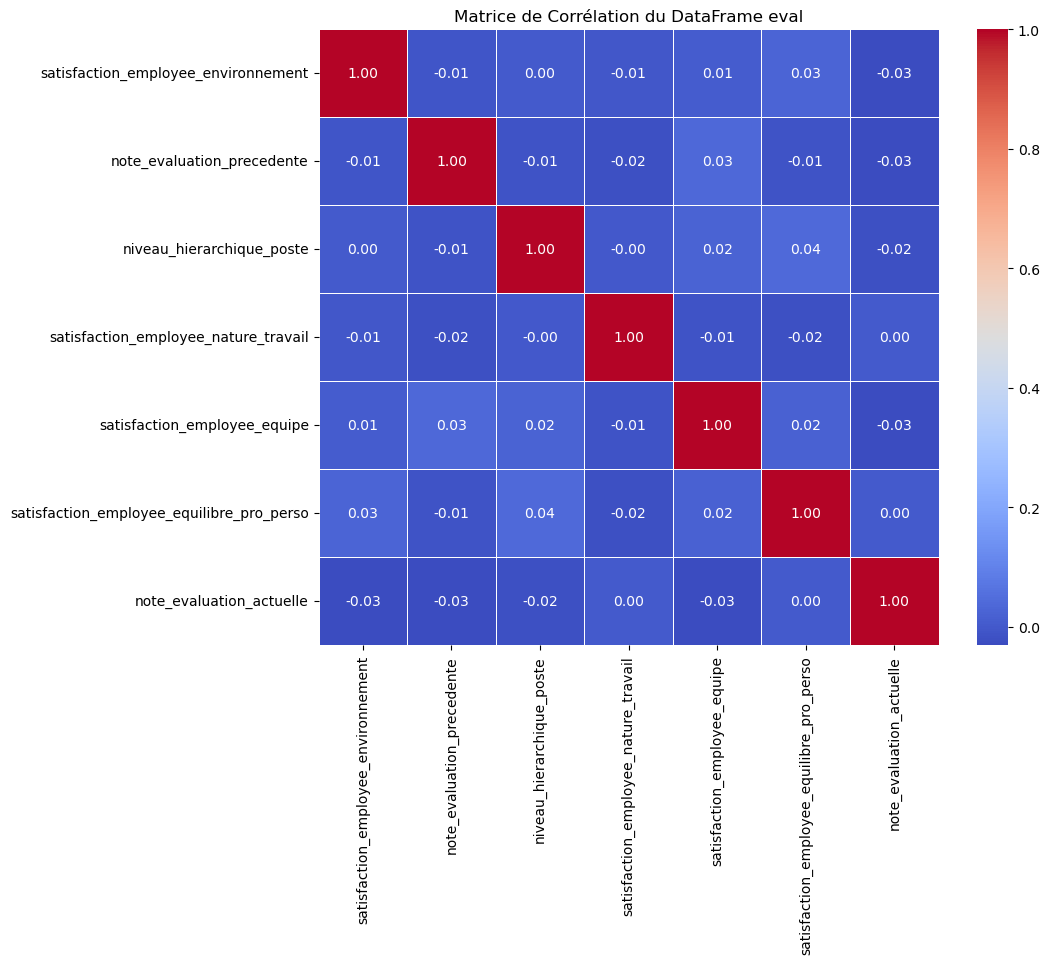

In [47]:
# Calcul de la corrélation
correlation_matrix = eval_num.corr()

# Création de la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Titre
plt.title('Matrice de Corrélation du DataFrame eval')
plt.show()

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\2962496159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eval[col], data=eval, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\2962496159.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=eval[col], data=eval, palette='viridis')


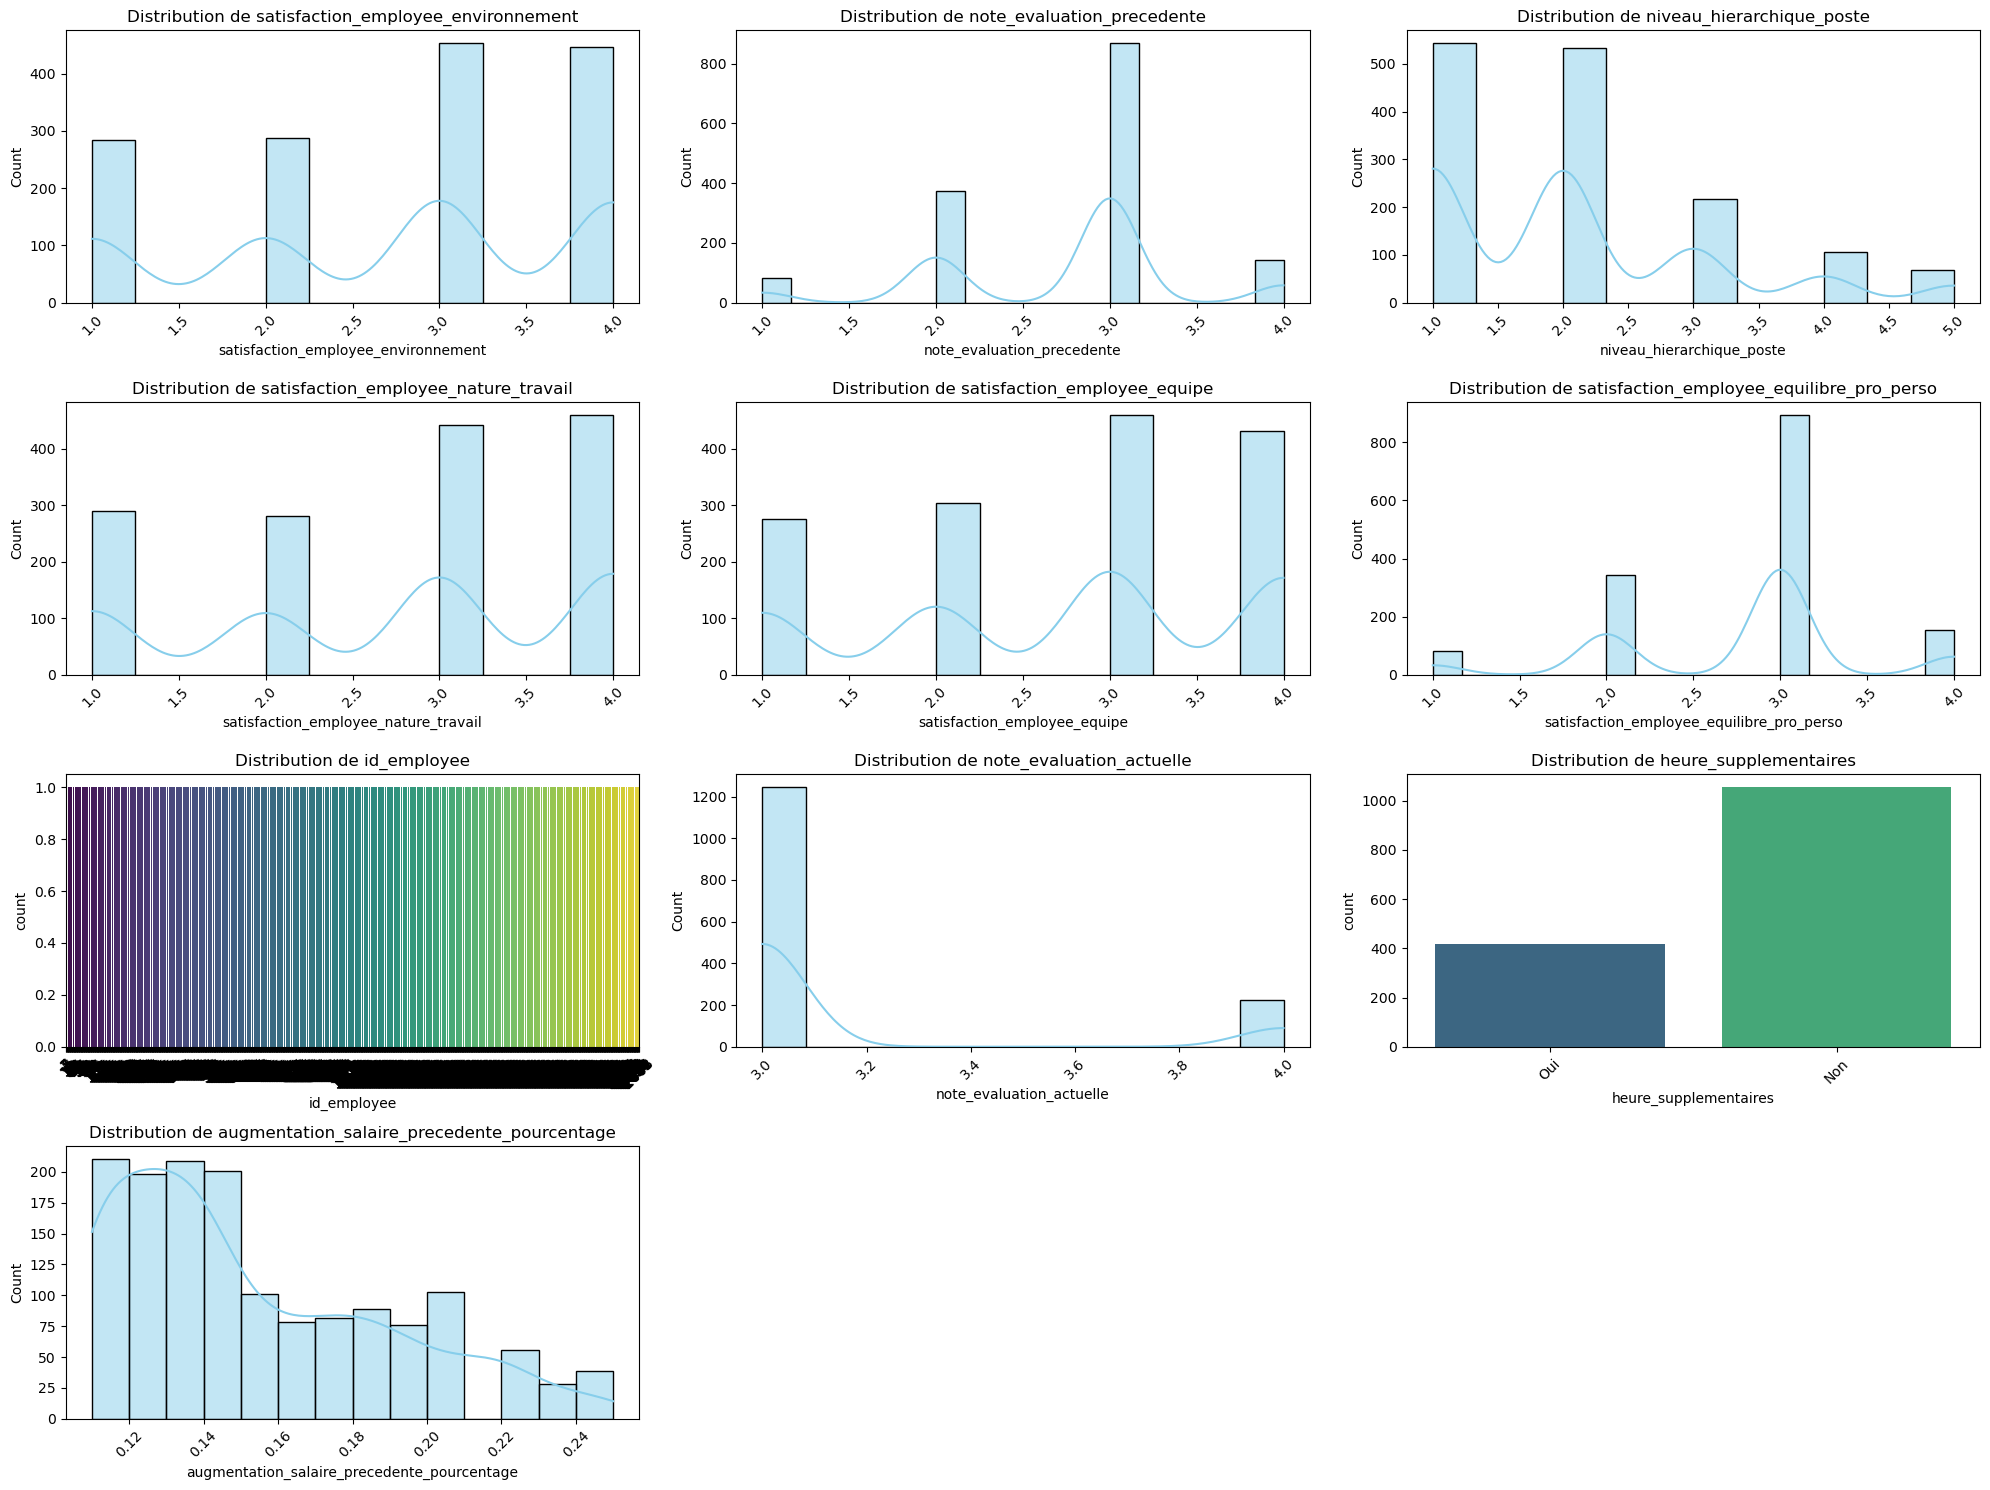

In [48]:
# On définit la liste des colonnes à tracer
cols = eval.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if eval[col].dtype in ['int64', 'float64']:
        sns.histplot(eval[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=eval[col], data=eval, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\260381942.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sondage[col], data=sondage, palette='viridis')


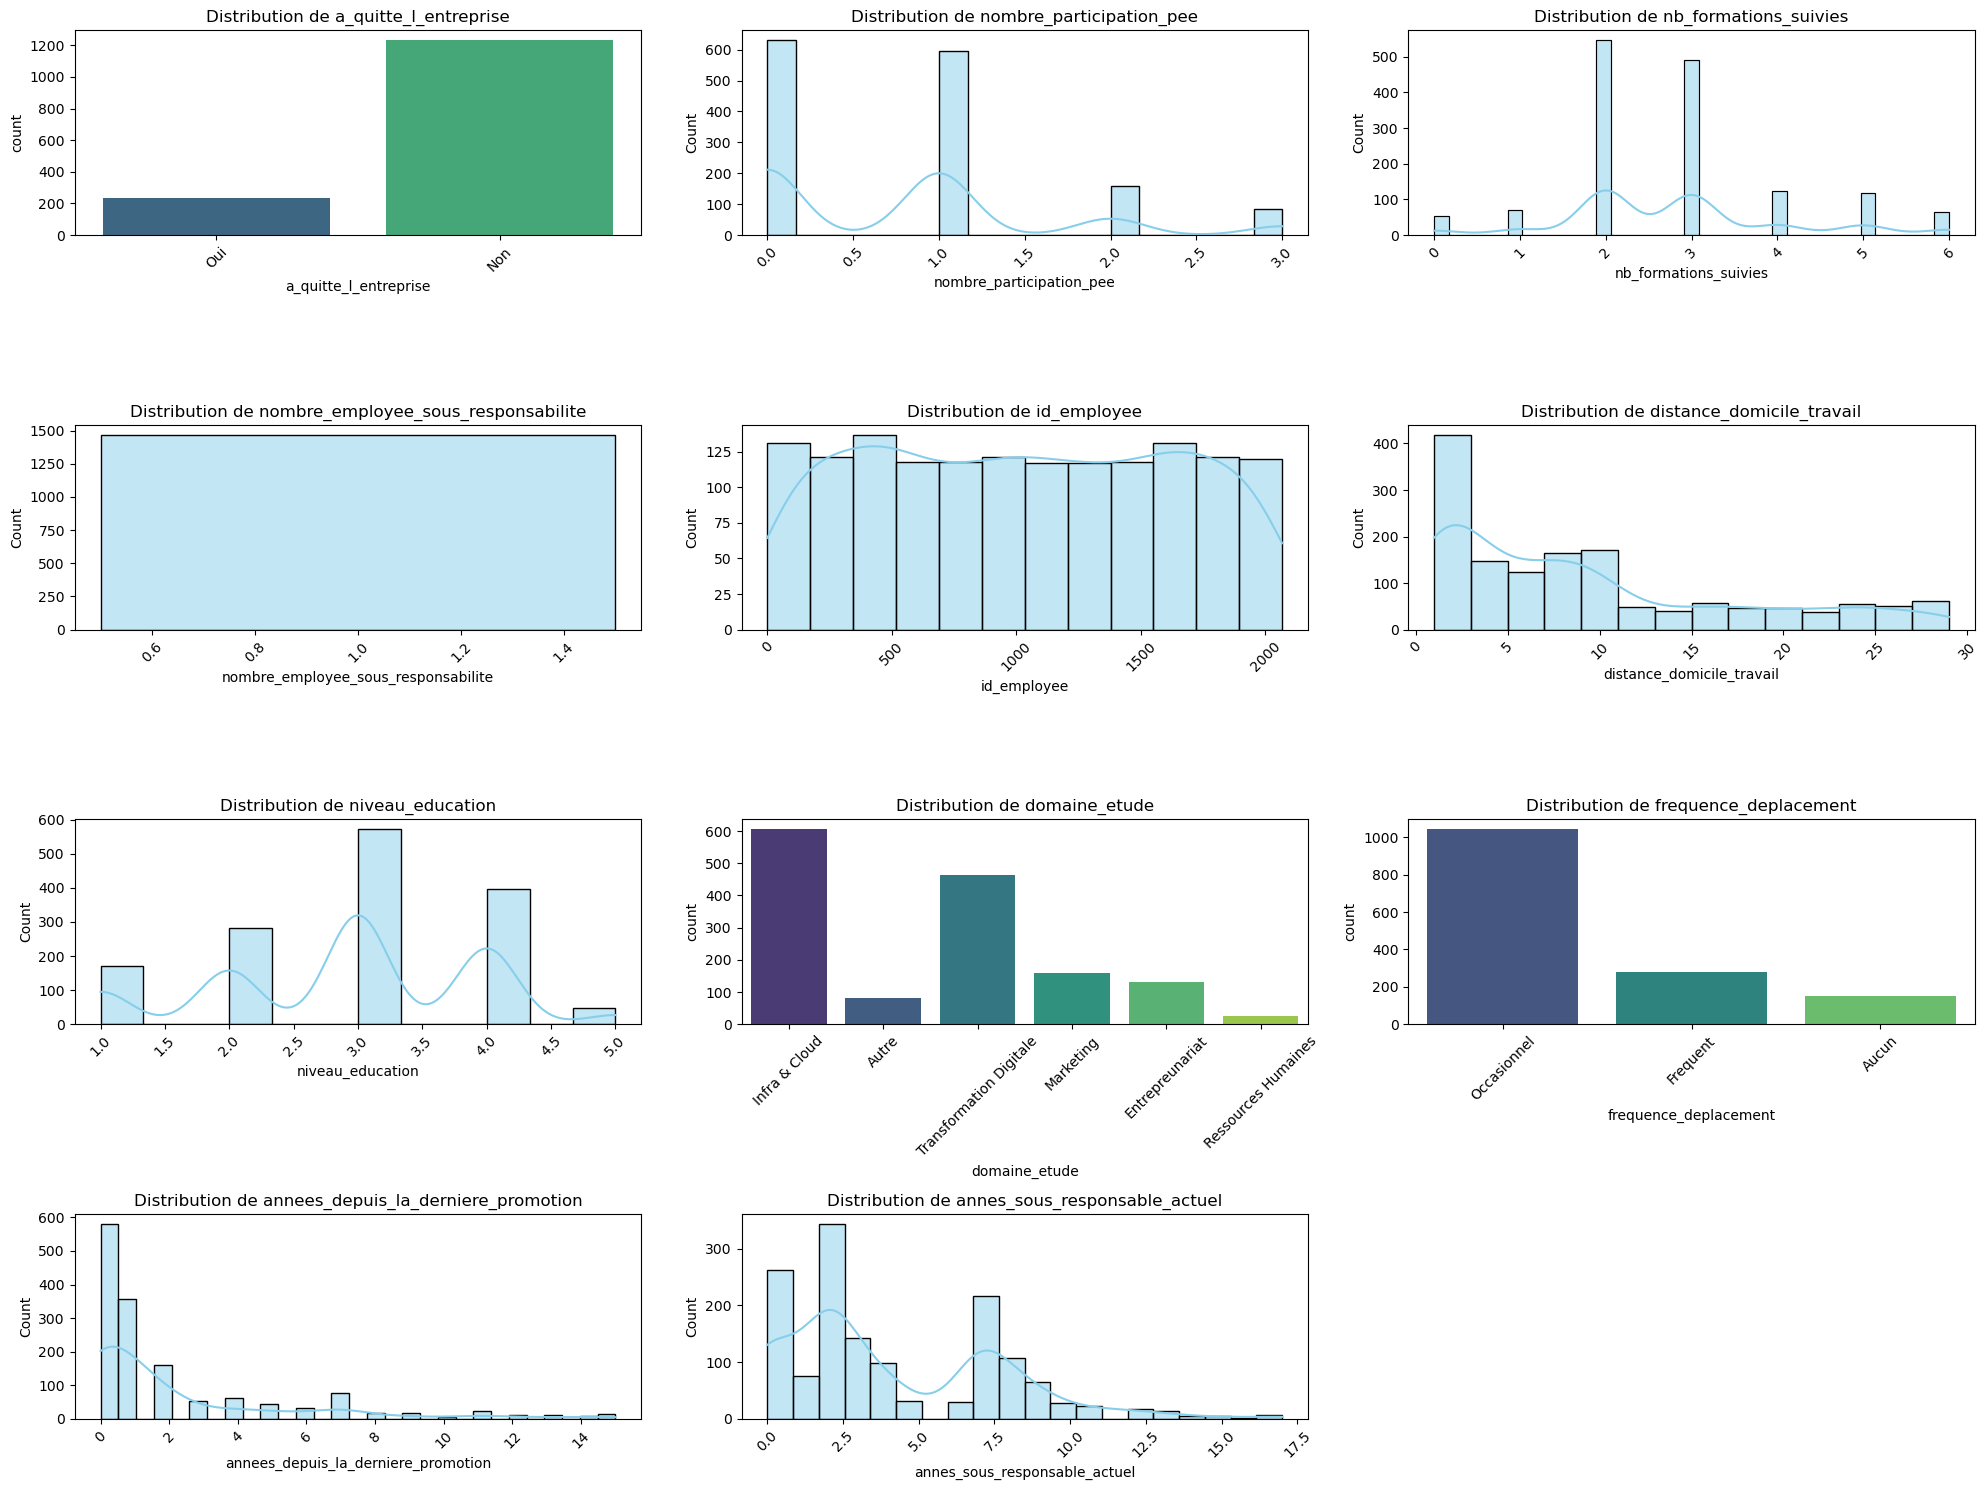

In [49]:
# On définit la liste des colonnes à tracer
cols = sondage.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if sondage[col].dtype in ['int64', 'float64']:
        sns.histplot(sondage[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=sondage[col], data=sondage, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\1826031885.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=sirh[col], data=sirh, palette='viridis')
C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\1826031885.py:15: Future

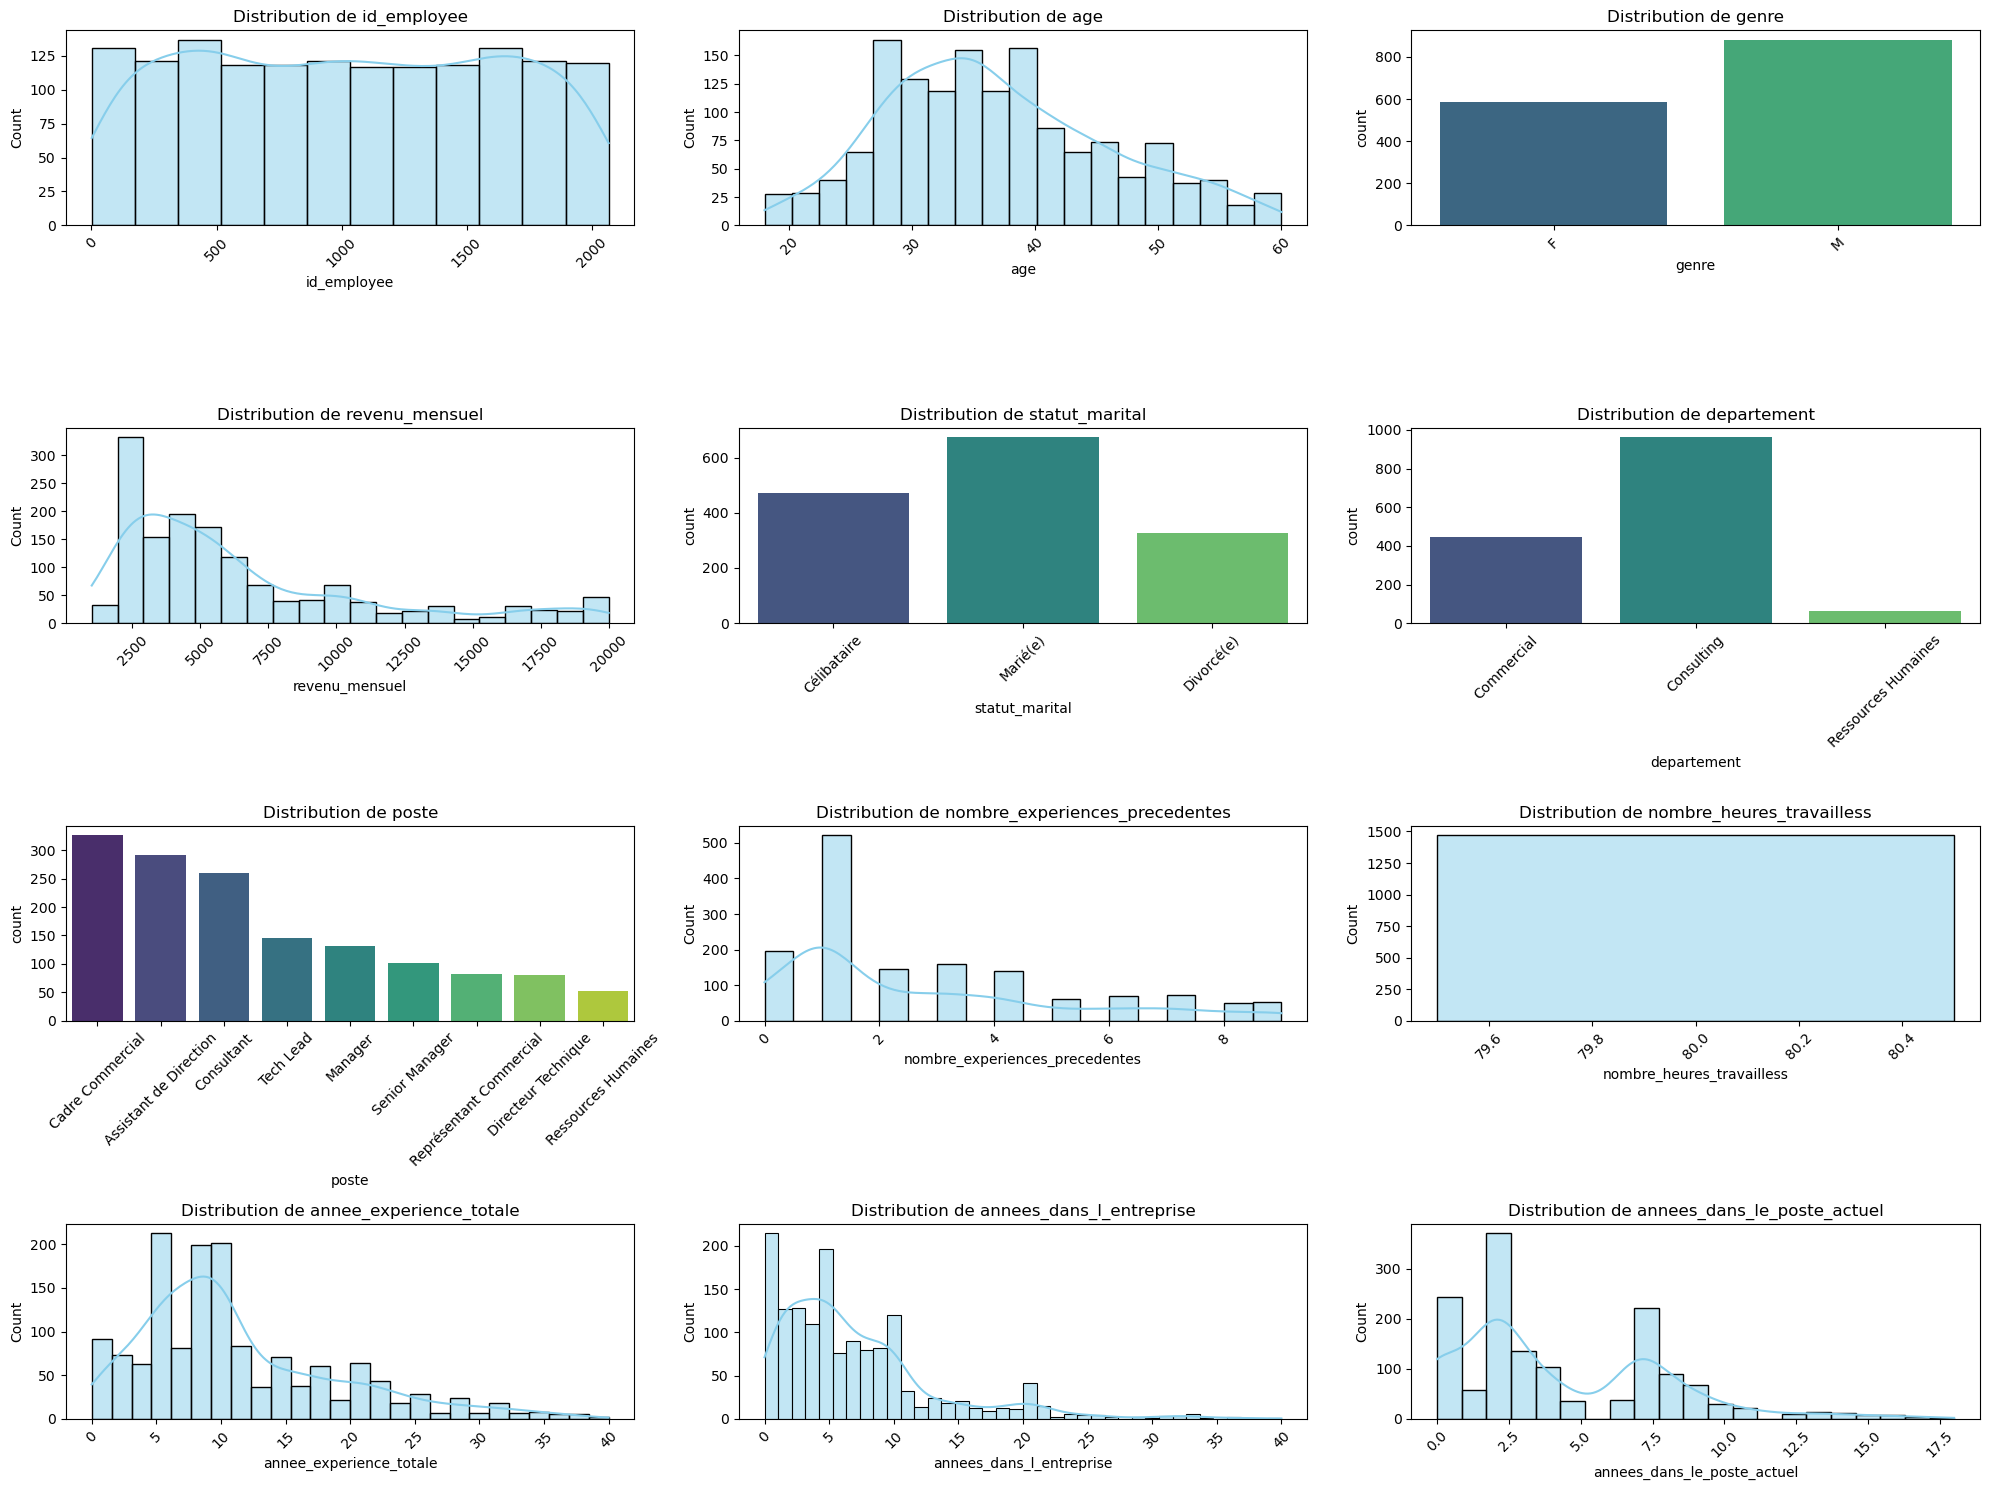

In [50]:
# On définit la liste des colonnes à tracer
cols = sirh.columns

# Création de la figure (on adapte la taille selon le nombre de colonnes)
plt.figure(figsize=(20, 15))

for i, col in enumerate(cols):
    plt.subplot(4, 3, i + 1) # Création d'une grille de 4 lignes et 3 colonnes
    
    # Si la colonne est numérique, on fait un histogramme classique
    if sirh[col].dtype in ['int64', 'float64']:
        sns.histplot(sirh[col], kde=True, color='skyblue')
    # Si c'est un objet (catégorielle), on utilise un countplot
    else:
        sns.countplot(x=sirh[col], data=sirh, palette='viridis')
        
    plt.title(f'Distribution de {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Feature engineering et Encodage

In [52]:
data

id_employee  age genre  revenu_mensuel statut_marital departement  \
0               1   41     F            5993    Célibataire  Commercial   
1               2   49     M            5130       Marié(e)  Consulting   
2               4   37     M            2090    Célibataire  Consulting   
3               5   33     F            2909       Marié(e)  Consulting   
4               7   27     M            3468       Marié(e)  Consulting   
...           ...  ...   ...             ...            ...         ...   
1465         2061   36     M            2571       Marié(e)  Consulting   
1466         2062   39     M            9991       Marié(e)  Consulting   
1467         2064   27     M            6142       Marié(e)  Consulting   
1468         2065   49     M            5390       Marié(e)  Commercial   
1469         2068   34     M            4404       Marié(e)  Consulting   

                       poste  nombre_experiences_precedentes  \
0           Cadre Commercial                               8   
1     Assistant de Direction                               1   
2                 Consultant                               6   
3     Assistant de Direction                               1   
4                 Consultant                               9   
...                      ...                             ...   
1465              Consultant                               4   
1466                 Manager                               4   
1467               Tech Lead                               1   
1468        Cadre Commercial                               2   
1469              Consultant                               2   

      nombre_heures_travailless  annee_experience_totale  ...  \
0                            80                        8  ...   
1                            80                       10  ...   
2                            80                        7  ...   
3                            80                        8  ...   
4                            80                        6  ...   
...                         ...                      ...  ...   
1465                         80                       17  ...   
1466                         80                        9  ...   
1467                         80                        6  ...   
1468                         80                       17  ...   
1469                         80                        6  ...   

      annes_sous_responsable_actuel  satisfaction_employee_environnement  \
0                                 5                                    2   
1                                 7                                    3   
2                                 0                                    4   
3                                 0                                    4   
4                                 2                                    1   
...                             ...                                  ...   
1465                              3                                    3   
1466                              7                                    4   
1467                              3                                    2   
1468                              8                                    4   
1469                              2                                    2   

     note_evaluation_precedente  niveau_hierarchique_poste  \
0                             3                          2   
1                             2                          2   
2                             2                          1   
3                             3                          1   
4                             3                          1   
...                         ...                        ...   
1465                          4                          2   
1466                          2                          3   
1467                          4                          2   
1468                  

## Encodage variables binaires

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id_employee                                  1470 non-null   int64  
 1   age                                          1470 non-null   int64  
 2   genre                                        1470 non-null   object 
 3   revenu_mensuel                               1470 non-null   int64  
 4   statut_marital                               1470 non-null   object 
 5   departement                                  1470 non-null   object 
 6   poste                                        1470 non-null   object 
 7   nombre_experiences_precedentes               1470 non-null   int64  
 8   nombre_heures_travailless                    1470 non-null   int64  
 9   annee_experience_totale                      1470 non-null   int64  
 10  

In [55]:
#tranformation de la colonne genre en variable binaire
data['genre']=data['genre'].replace(to_replace=['F','M'], value=[0, 1])

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\769674825.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['genre']=data['genre'].replace(to_replace=['F','M'], value=[0, 1])


In [56]:
#tranformation de la colonne heure_supplementaires en variable binaire
data['heure_supplementaires']=data['heure_supplementaires'].replace(to_replace=['Non','Oui'], value=[0, 1])

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\3082335643.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['heure_supplementaires']=data['heure_supplementaires'].replace(to_replace=['Non','Oui'], value=[0, 1])


In [57]:
#tranformation de la colonne a_quitte_l_entreprise en variable binaire
data['a_quitte_l_entreprise']=data['a_quitte_l_entreprise'].replace(to_replace=['Non','Oui'], value=[0, 1])

C:\Users\Lavin\AppData\Local\Temp\ipykernel_8140\564874590.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['a_quitte_l_entreprise']=data['a_quitte_l_entreprise'].replace(to_replace=['Non','Oui'], value=[0, 1])


## Encodage variables qualitatives

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id_employee                                  1470 non-null   int64  
 1   age                                          1470 non-null   int64  
 2   genre                                        1470 non-null   int64  
 3   revenu_mensuel                               1470 non-null   int64  
 4   statut_marital                               1470 non-null   object 
 5   departement                                  1470 non-null   object 
 6   poste                                        1470 non-null   object 
 7   nombre_experiences_precedentes               1470 non-null   int64  
 8   nombre_heures_travailless                    1470 non-null   int64  
 9   annee_experience_totale                      1470 non-null   int64  
 10  

**Les variables à encoder :**

* **Ordinales :**
    * `frequence_deplacement`

   
* **Non Ordinales :**
    * `domaine_etude`
    * `departement`
    * `statut_marital`
    * `poste`

In [61]:
data['poste'].value_counts()

poste
Cadre Commercial           326
Assistant de Direction     292
Consultant                 259
Tech Lead                  145
Manager                    131
Senior Manager             102
Représentant Commercial     83
Directeur Technique         80
Ressources Humaines         52
Name: count, dtype: int64

In [62]:
data['frequence_deplacement'].value_counts()

frequence_deplacement
Occasionnel    1043
Frequent        277
Aucun           150
Name: count, dtype: int64

In [63]:
#Fonction encodage
def encoder_donnees(df):
    df_encoded = df.copy()
    
    # 1. ENCODAGE ORDINAL  frequence_deplacement

    ordre_deplacement = {'Aucun': 0, 'Occasionnel': 1, 'Frequent': 2}
    df_encoded['frequence_deplacement'] = df_encoded['frequence_deplacement'].map(ordre_deplacement)
    
    # 2. ENCODAGE NON-ORDINAL (One-Hot Encoding)
    variables_nominales = ['domaine_etude', 'departement', 'statut_marital','poste']
    df_encoded = pd.get_dummies(df_encoded, columns=variables_nominales, prefix=variables_nominales)
    
    return df_encoded

In [64]:
data = encoder_donnees(data)

In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id_employee                                  1470 non-null   int64  
 1   age                                          1470 non-null   int64  
 2   genre                                        1470 non-null   int64  
 3   revenu_mensuel                               1470 non-null   int64  
 4   nombre_experiences_precedentes               1470 non-null   int64  
 5   nombre_heures_travailless                    1470 non-null   int64  
 6   annee_experience_totale                      1470 non-null   int64  
 7   annees_dans_l_entreprise                     1470 non-null   int64  
 8   annees_dans_le_poste_actuel                  1470 non-null   int64  
 9   a_quitte_l_entreprise                        1470 non-null   int64  
 10  

In [66]:
# Convertit toutes les colonnes True/False en 1/0
data = data.astype({col: int for col in data.select_dtypes('bool').columns})

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 48 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   id_employee                                  1470 non-null   int64  
 1   age                                          1470 non-null   int64  
 2   genre                                        1470 non-null   int64  
 3   revenu_mensuel                               1470 non-null   int64  
 4   nombre_experiences_precedentes               1470 non-null   int64  
 5   nombre_heures_travailless                    1470 non-null   int64  
 6   annee_experience_totale                      1470 non-null   int64  
 7   annees_dans_l_entreprise                     1470 non-null   int64  
 8   annees_dans_le_poste_actuel                  1470 non-null   int64  
 9   a_quitte_l_entreprise                        1470 non-null   int64  
 10  

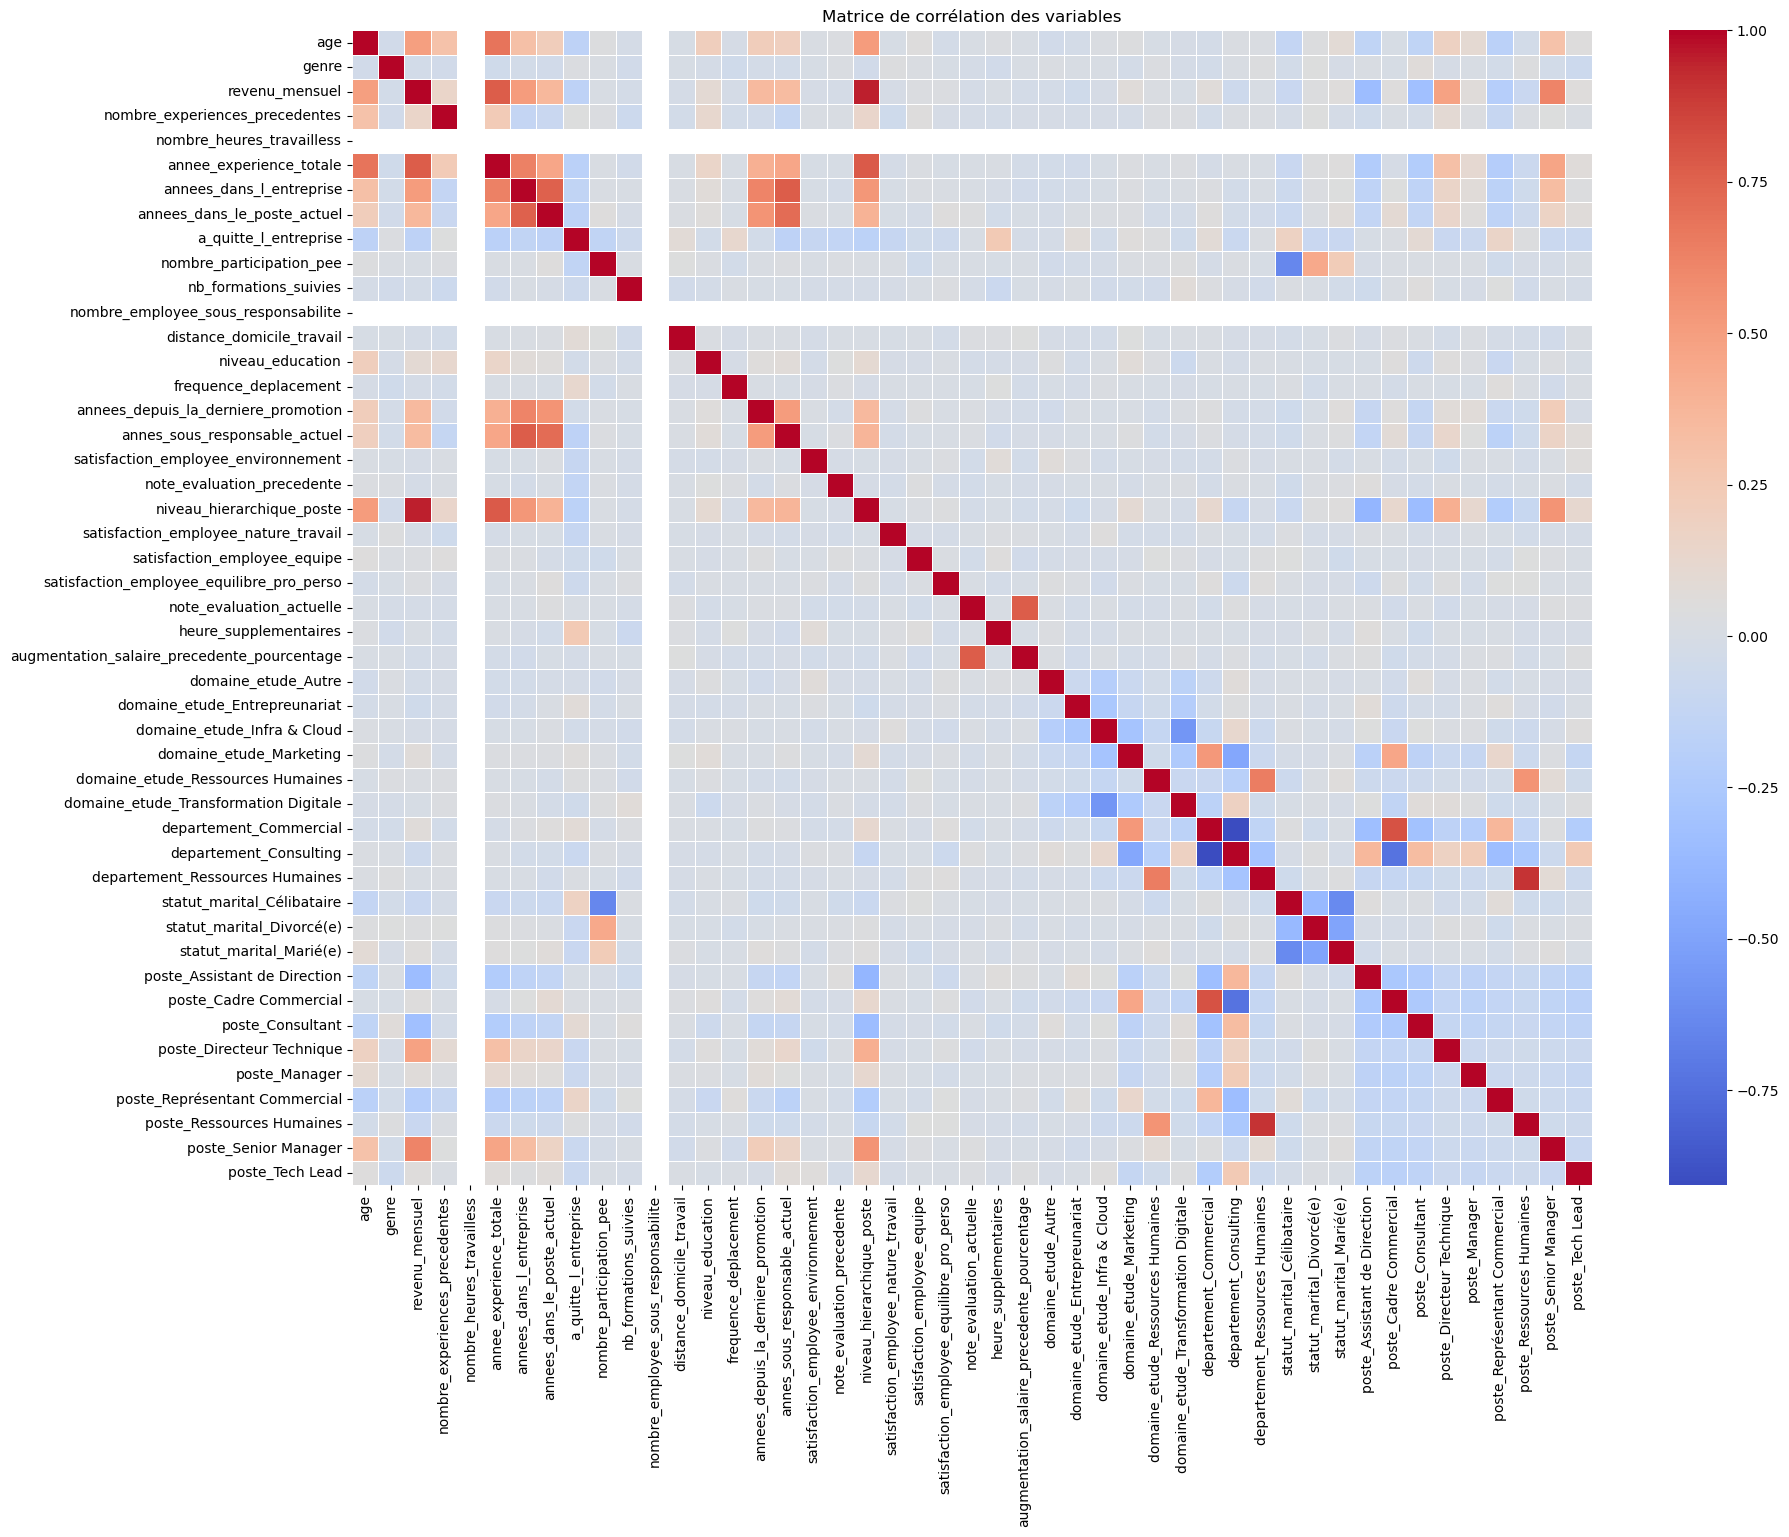

In [68]:
# On calcule la matrice de corrélation
corr_matrix = data.drop(columns=['id_employee']).corr()

# Configuration de la taille du graphique
plt.figure(figsize=(20, 15))

# Création de la heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation des variables")
plt.show()

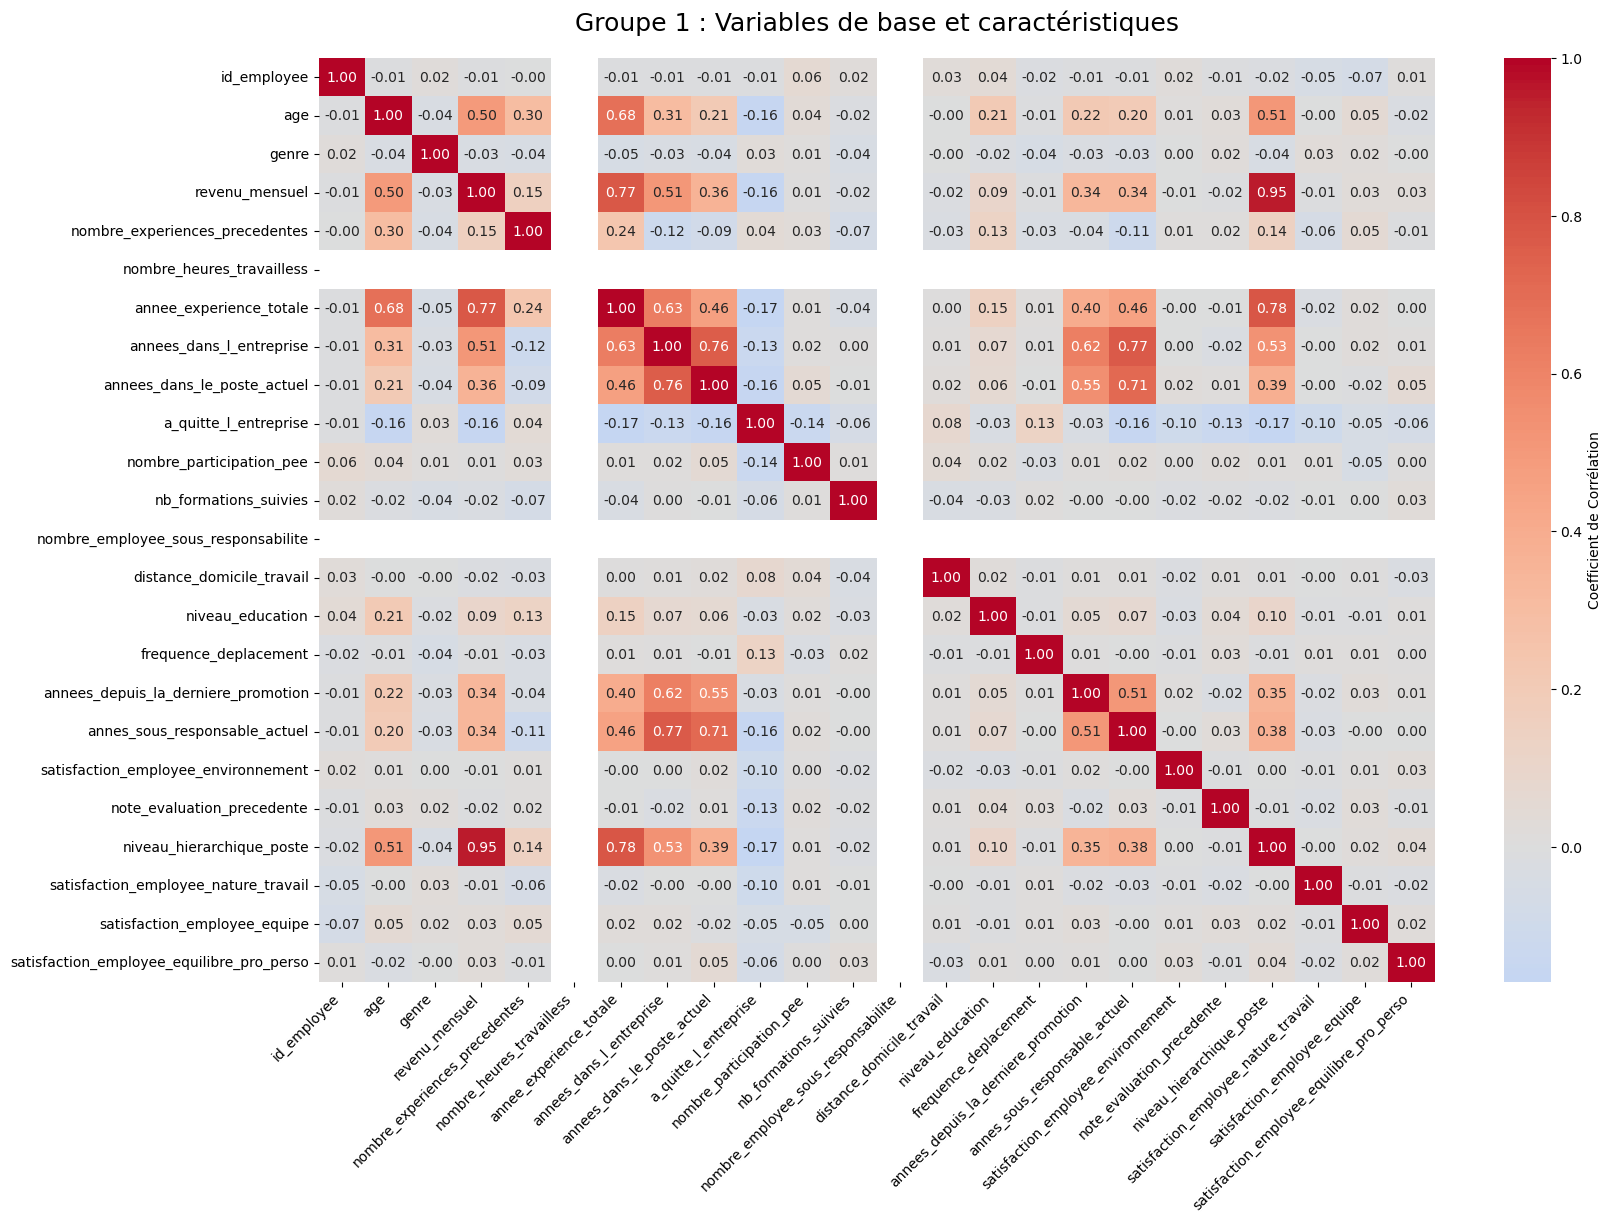

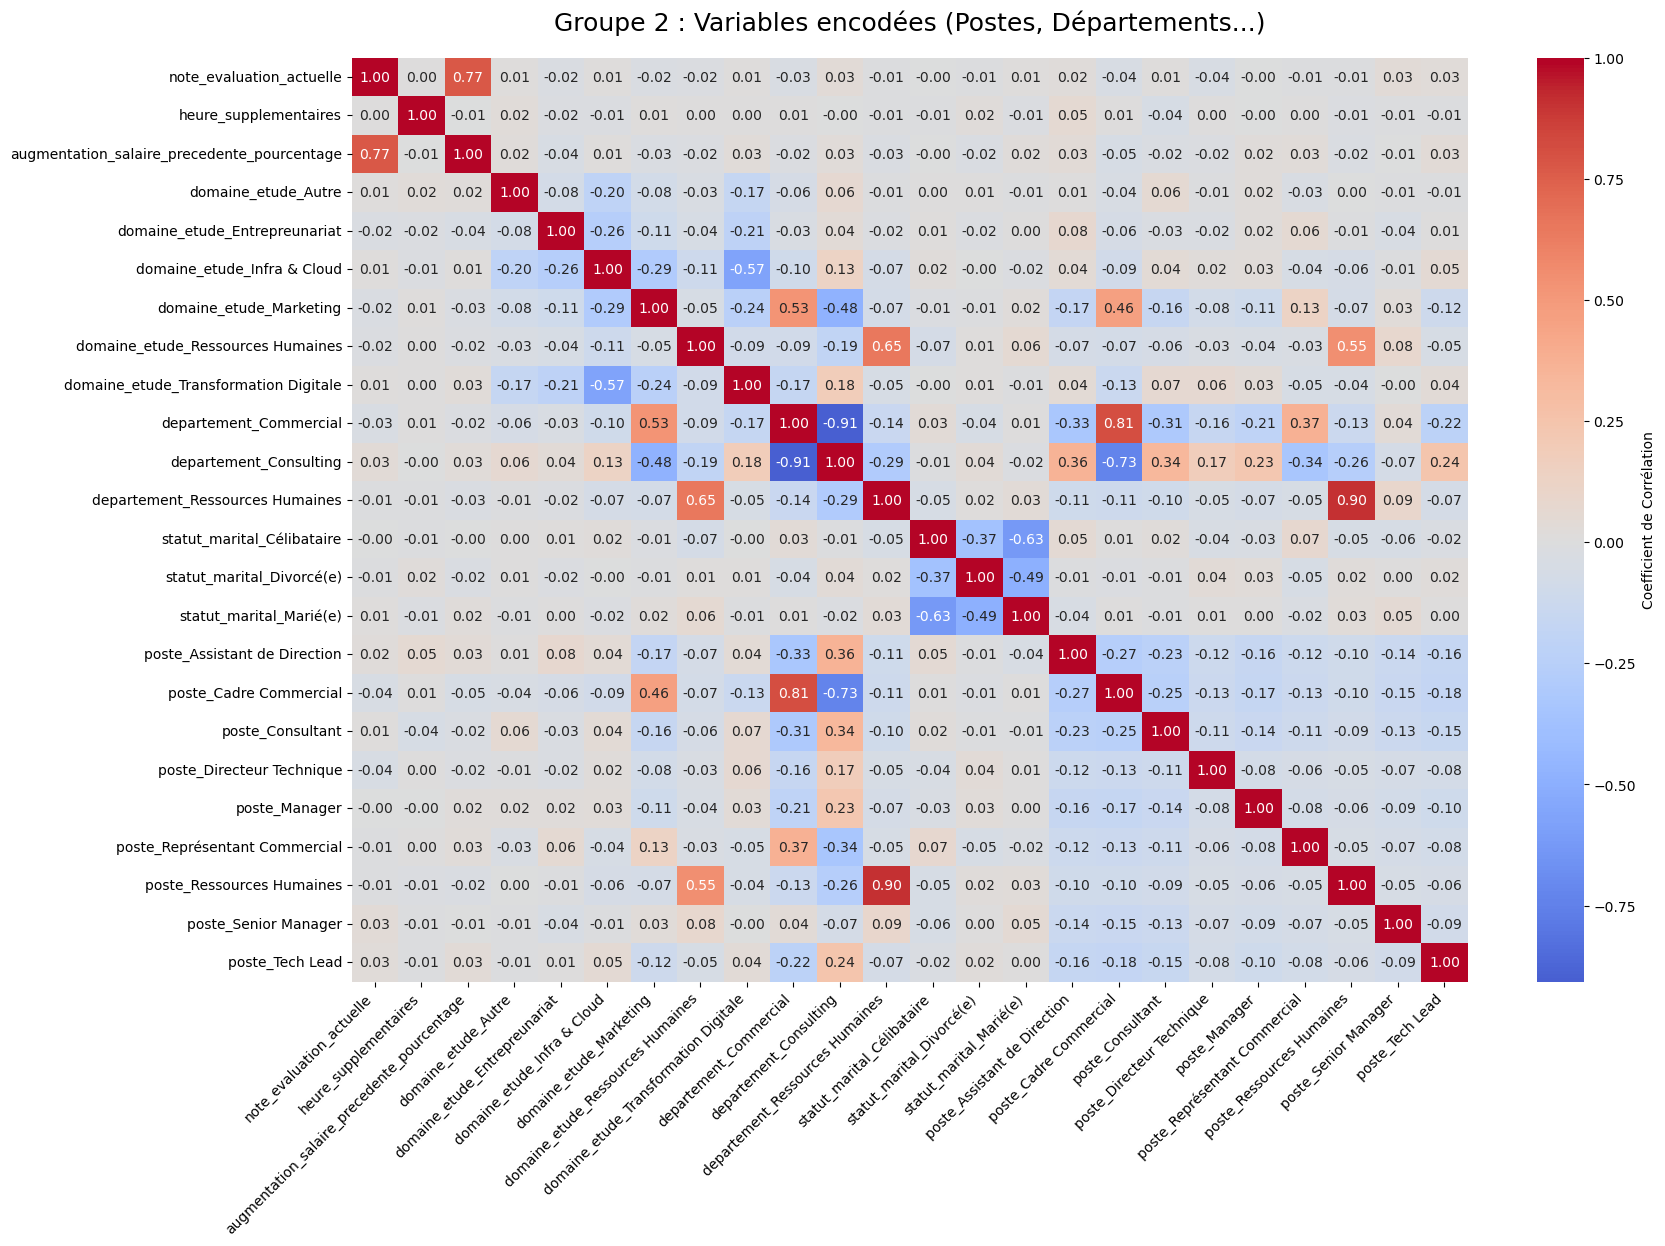

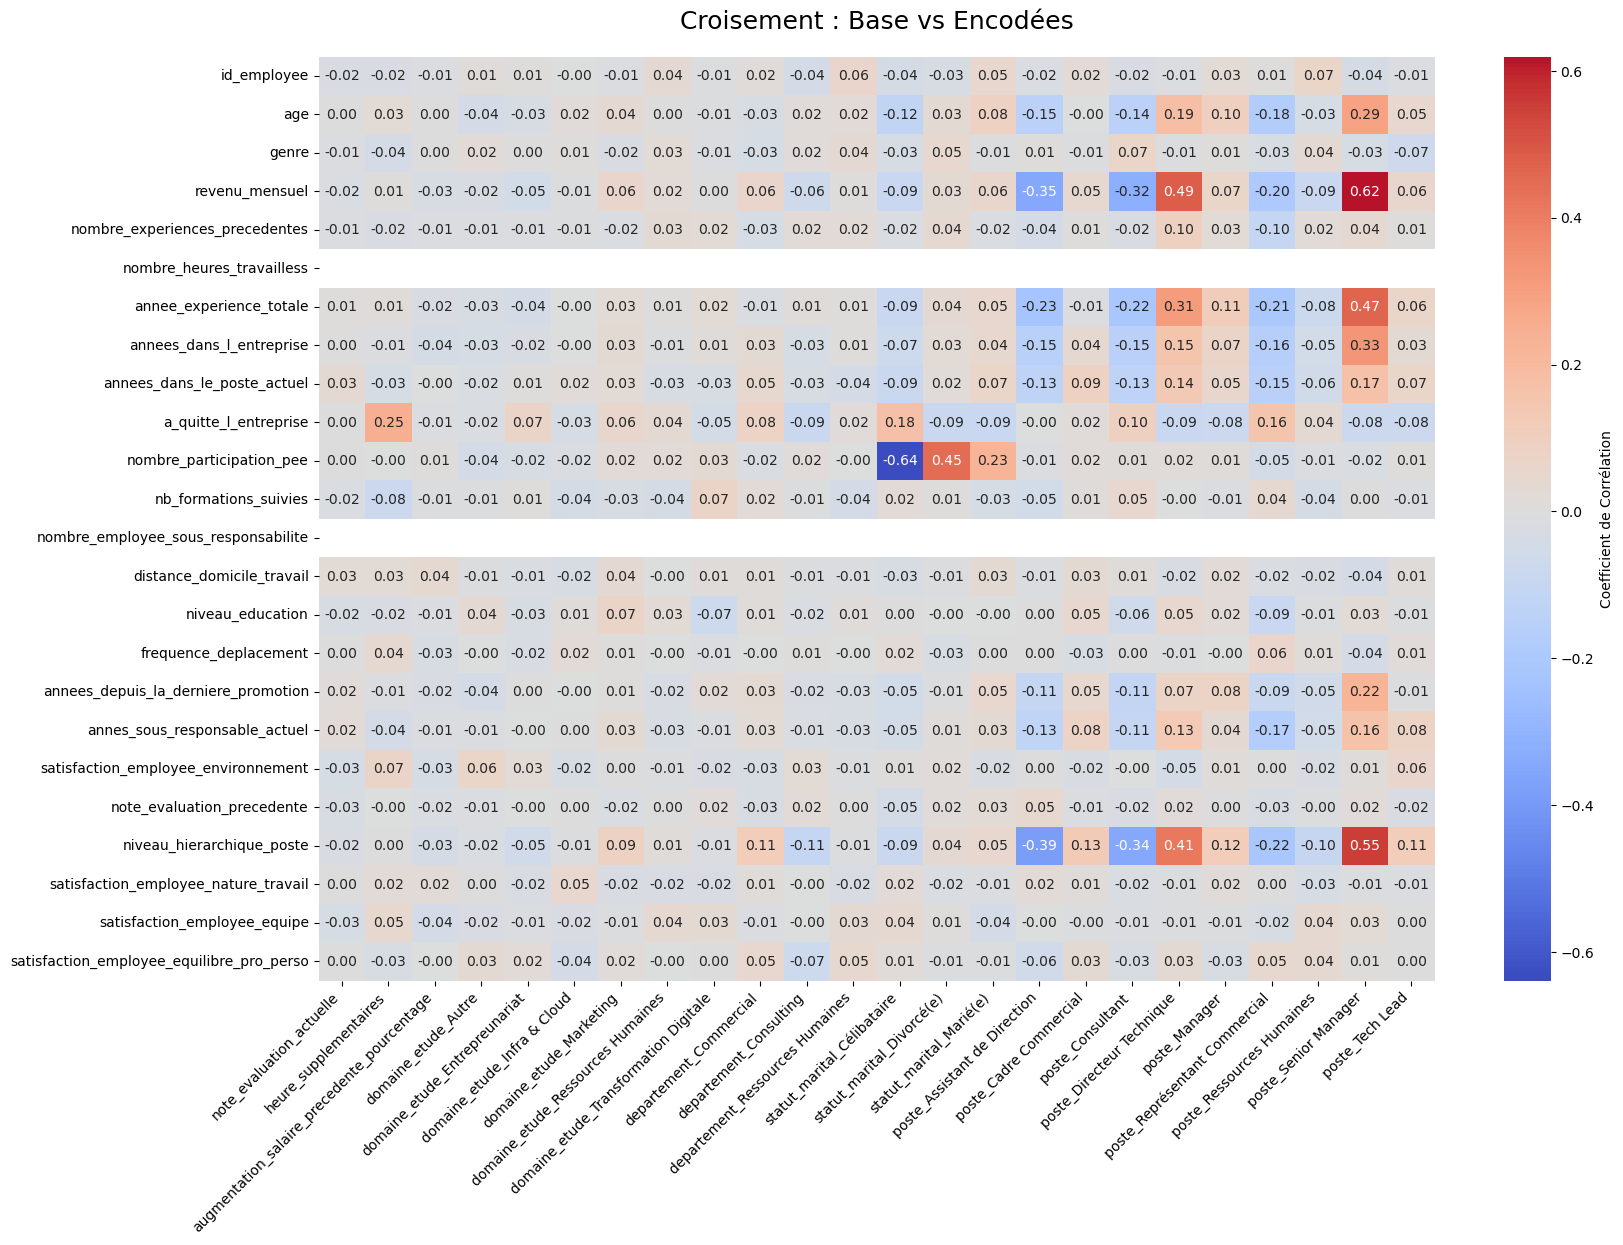

In [69]:
# 1. Préparation des groupes de colonnes
cols = data.columns.tolist()
n = len(cols)
chunk_size = int(np.ceil(n / 2))
group1 = cols[:chunk_size]
group2 = cols[chunk_size:]

# 2. Définition des paires de groupes à comparer
group_pairs = [
    (group1, group1, "Groupe 1 : Variables de base et caractéristiques"),
    (group2, group2, "Groupe 2 : Variables encodées (Postes, Départements...)"),
    (group1, group2, "Croisement : Base vs Encodées"),
]

# 3. Boucle d'affichage (chaque heatmap est générée séparément)
for row_cols, col_cols, title in group_pairs:
    # Calcul de la corrélation spécifique
    sub_corr = data[list(set(row_cols + col_cols))].corr()
    sub_corr = sub_corr.loc[row_cols, col_cols]
    
    # Création d'une nouvelle figure pour chaque heatmap
    plt.figure(figsize=(18, 12)) # Taille très large
    
    sns.heatmap(sub_corr, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                center=0,
                annot_kws={"size": 10}, # Texte des scores plus gros
                cbar_kws={'label': 'Coefficient de Corrélation'})
    
    plt.title(title, fontsize=18, pad=20)
    plt.xticks(rotation=45, ha='right') # Rotation des labels pour la lisibilité
    plt.show()

In [70]:
# --- ÉTAPE 1 : AUTOMATISATION DU FILTRAGE ---
threshold = 0.85
corr_matrix = data.corr().abs()

# Sélection du triangle supérieur
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Identification des colonnes à supprimer (> 0.85 ou < -0.85)
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

print(f"Suppression de {len(to_drop)} colonnes : {to_drop}")


Suppression de 3 colonnes : ['niveau_hierarchique_poste', 'departement_Consulting', 'poste_Ressources Humaines']


In [71]:
#Suppression des colonnes suggérées
data=data.drop(columns=to_drop)

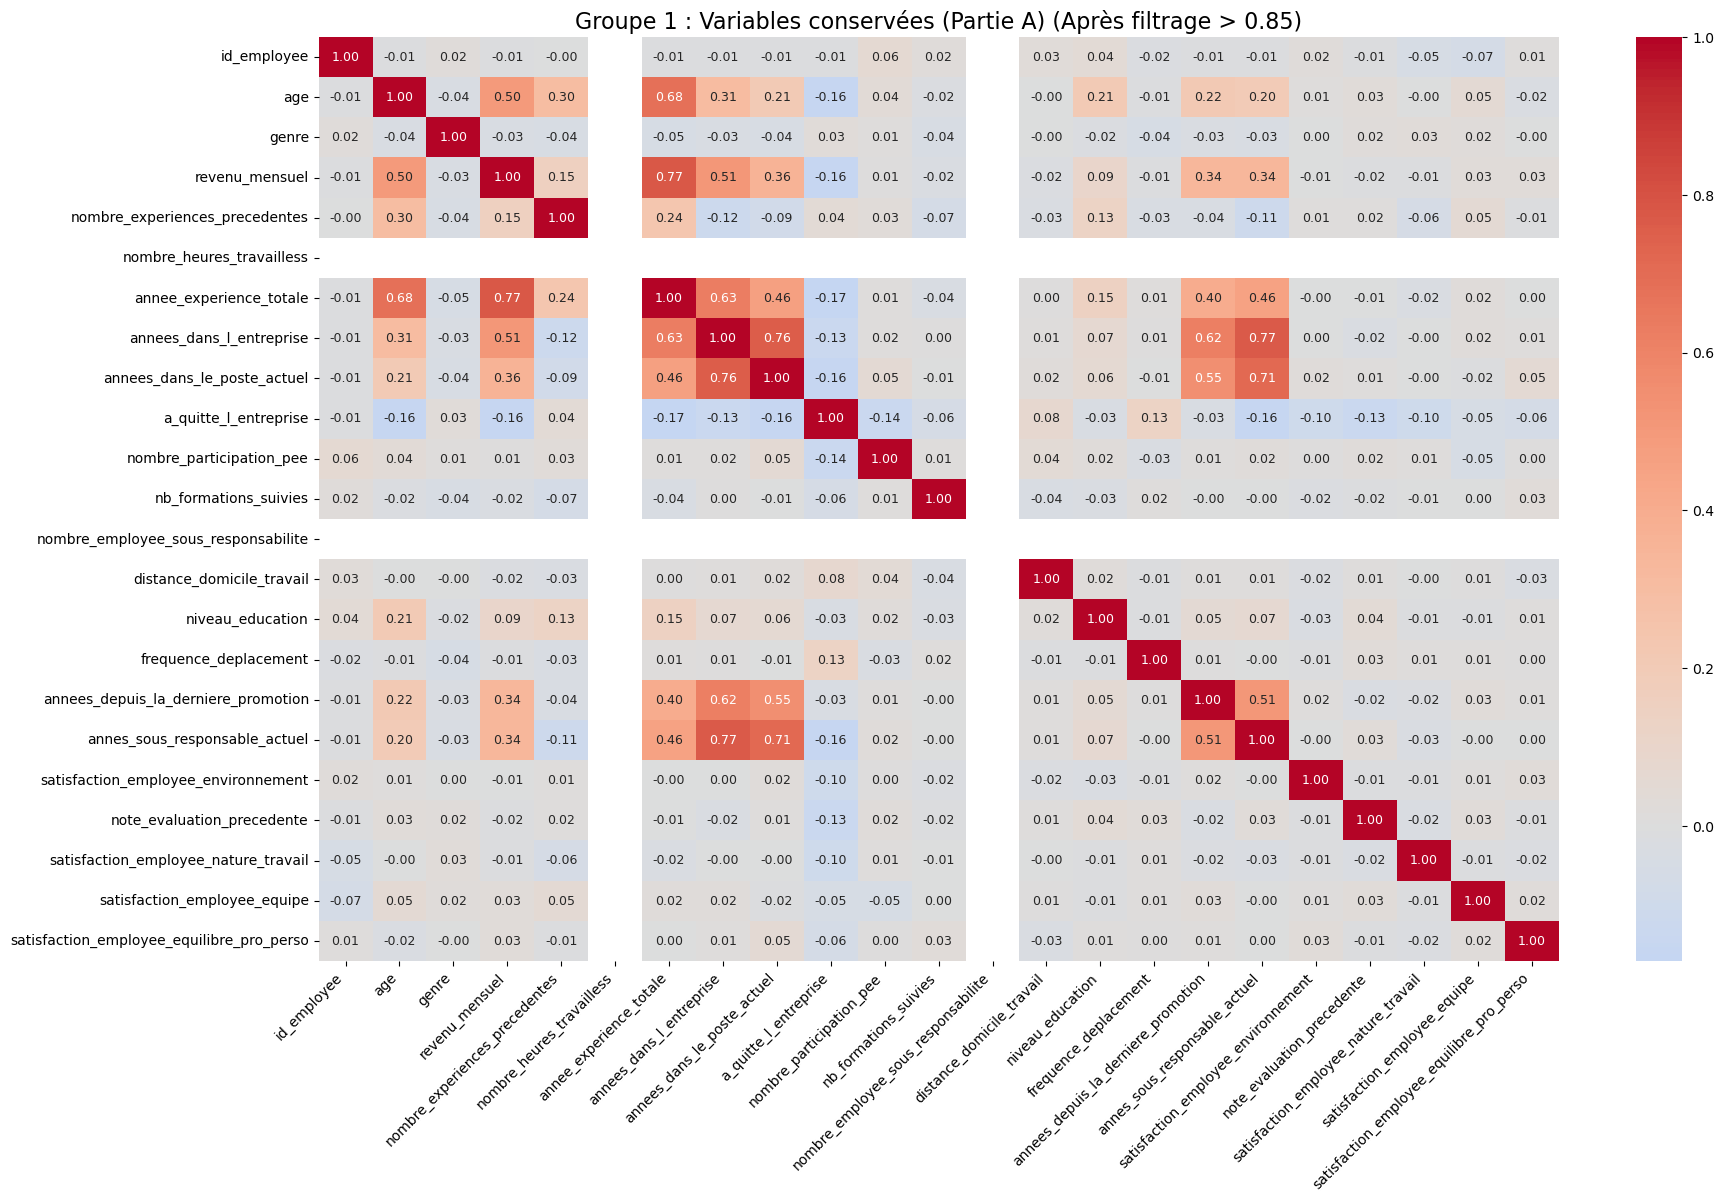

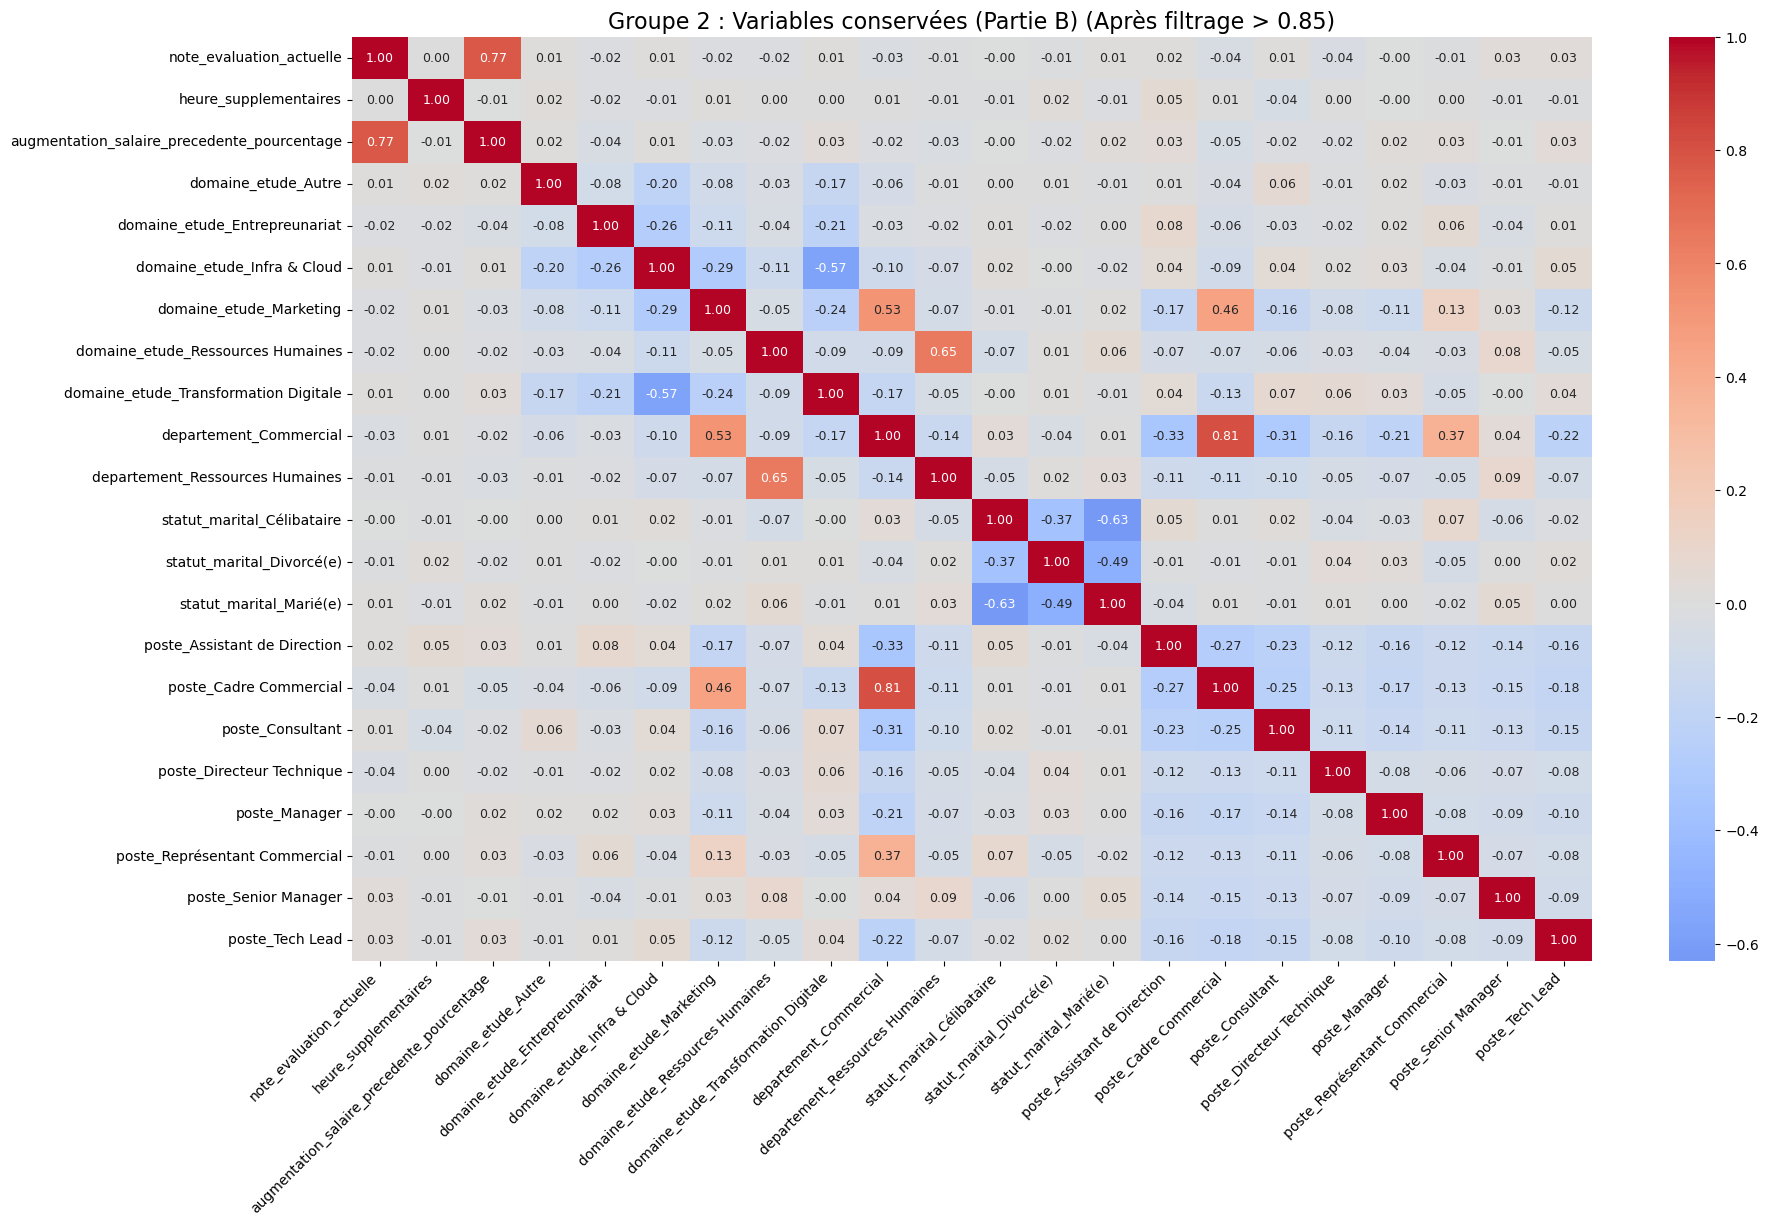

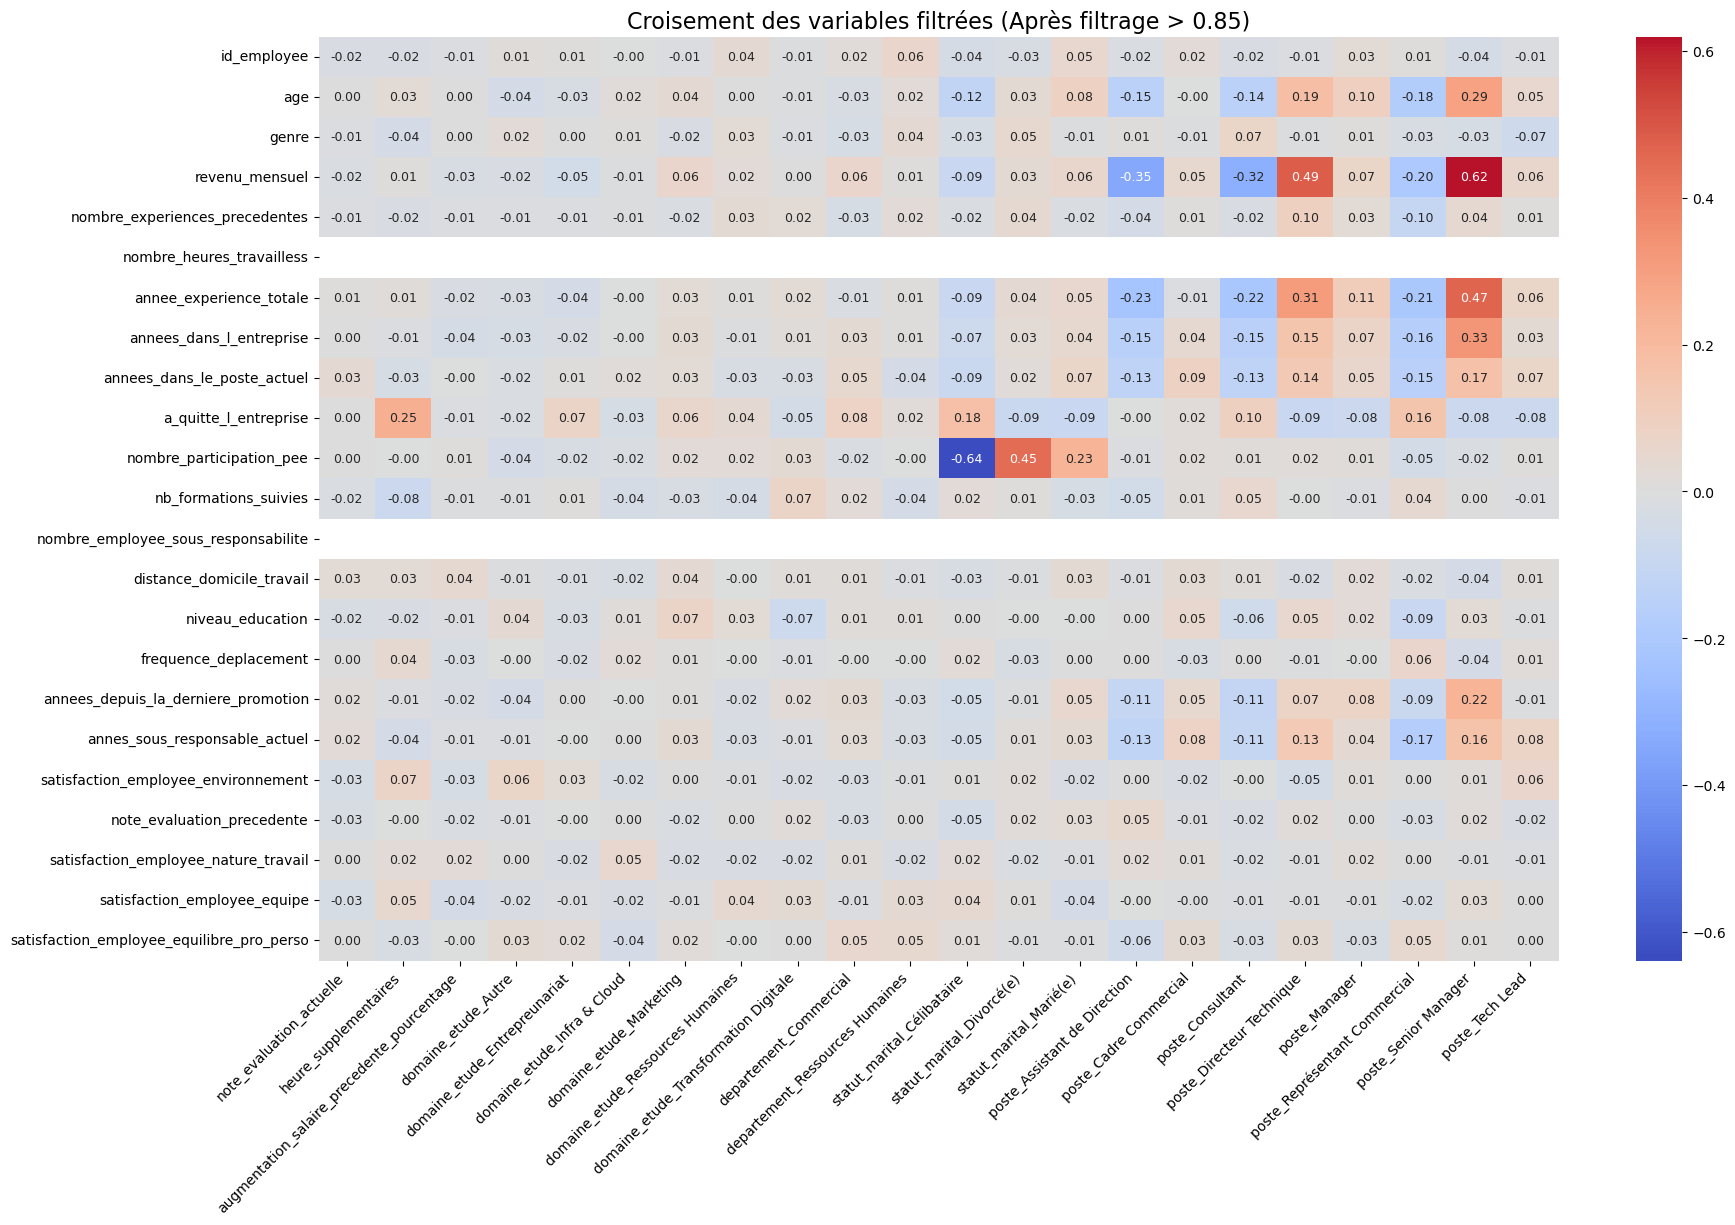

In [72]:
# VISUALISATION DU DATASET FILTRÉ ---
cols_clean = data.columns.tolist()
n = len(cols_clean)
chunk_size = int(np.ceil(n / 2))

group1 = cols_clean[:chunk_size]
group2 = cols_clean[chunk_size:]

# Définition des paires à afficher
group_pairs = [
    (group1, group1, "Groupe 1 : Variables conservées (Partie A)"),
    (group2, group2, "Groupe 2 : Variables conservées (Partie B)"),
    (group1, group2, "Croisement des variables filtrées"),
]

for row_cols, col_cols, title in group_pairs:
    # On recalcule la corrélation sur le dataset filtré
    sub_corr = data[list(set(row_cols + col_cols))].corr()
    sub_corr = sub_corr.loc[row_cols, col_cols]
    
    plt.figure(figsize=(20, 12))
    sns.heatmap(sub_corr, 
                annot=True, 
                fmt=".2f", 
                cmap='coolwarm', 
                center=0,
                annot_kws={"size": 9})
    
    plt.title(title + " (Après filtrage > 0.85)", fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.show()

# Modélisation

## Split train/test

In [75]:
X = data.drop(['id_employee', 'a_quitte_l_entreprise'], axis=1)
y = data['a_quitte_l_entreprise']

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# On applique le scaling sur les variables numériques (pas besoin sur les colonnes binaires 0/1, mais le faire sur tout le X ne fait pas de mal)
X_scaled = scaler.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 2. Split Train (80%) et Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Scaling (Normalisation)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Taille de l'entraînement : {X_train_scaled.shape[0]} échantillons")
print(f"Taille du test : {X_test_scaled.shape[0]} échantillons")

Taille de l'entraînement : 1176 échantillons
Taille du test : 294 échantillons


## Création et comparaison de modèles

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier # Import du modèle étalon
from sklearn.metrics import accuracy_score, classification_report

# Définition des modèles incluant le Dummy
modeles = {
    "Modèle Étalon": DummyClassifier(strategy="most_frequent"),
    "Régression Logistique": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(probability=True)
}

# Boucle d'entraînement et évaluation
resultats = {}

for nom, model in modeles.items():
    model.fit(X_train_scaled, y_train)
    predictions = model.predict(X_test_scaled)
    score = accuracy_score(y_test, predictions)
    resultats[nom] = score
    
    print(f"\n" + "="*30)
    print(f"--- {nom} ---")
    print(f"Précision globale (Accuracy) : {score:.2%}")
    print(classification_report(y_test, predictions, zero_division=0))


--- Modèle Étalon ---
Précision globale (Accuracy) : 84.01%
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294


--- Régression Logistique ---
Précision globale (Accuracy) : 86.05%
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       247
           1       0.61      0.36      0.45        47

    accuracy                           0.86       294
   macro avg       0.75      0.66      0.69       294
weighted avg       0.84      0.86      0.85       294


--- Random Forest ---
Précision globale (Accuracy) : 83.67%
              precision    recall  f1-score   support

           0       0.85      0.98      0.91       247
           1       0.45      0.11      0.17   

Les résultats prédisent tous très mal le 1 qui est le score qui m'intéressent. Joptimise mes modèles

In [81]:
# Teste avec la Régression Logistique pondérée
model_balanced = LogisticRegression(class_weight='balanced')
model_balanced.fit(X_train_scaled, y_train)

# Teste avec Random Forest pondéré
rf_balanced = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_balanced.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Définition des modèles avec équilibrage des classes
modeles_opti = {
    "Régression Logistique (Opti)": LogisticRegression(class_weight='balanced', random_state=42),
    "Random Forest (Opti)": RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    "SVM (Opti)": SVC(class_weight='balanced', probability=True, random_state=42)
}

# Dictionnaire pour stocker les prédictions
all_preds = {}

for nom, model in modeles_opti.items():
    model.fit(X_train_scaled, y_train)
    preds = model.predict(X_test_scaled)
    all_preds[nom] = preds
    
    print(f"\n🚀 {nom}")
    print(classification_report(y_test, preds))


🚀 Régression Logistique (Opti)
              precision    recall  f1-score   support

           0       0.93      0.79      0.85       247
           1       0.38      0.68      0.48        47

    accuracy                           0.77       294
   macro avg       0.65      0.73      0.67       294
weighted avg       0.84      0.77      0.79       294


🚀 Random Forest (Opti)
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294


🚀 SVM (Opti)
              precision    recall  f1-score   support

           0       0.90      0.89      0.90       247
           1       0.46      0.51      0.48        47

    accuracy                           0.83       294
   macro avg       0.68      0.70      0.69       294
weig

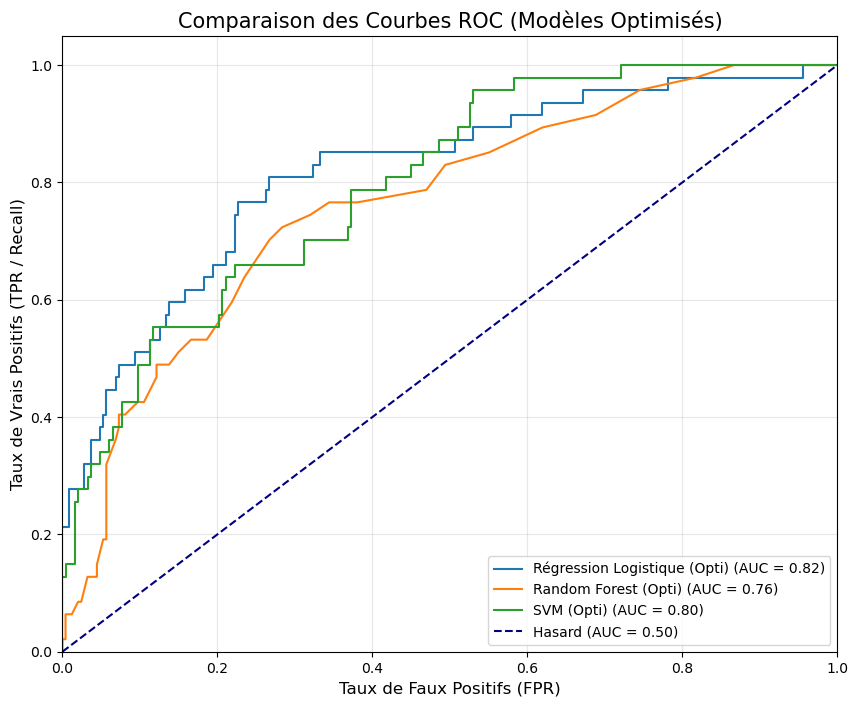

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Configuration du graphique
plt.figure(figsize=(10, 8))

# On itère sur tes modèles optimisés
for nom, model in modeles_opti.items():
    # On récupère les probabilités de la classe 1 (le salarié part)
    # [:, 1] car predict_proba renvoie [prob_classe_0, prob_classe_1]
    probs = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcul de la courbe ROC
    fpr, tpr, thresholds = roc_curve(y_test, probs)
    
    # Calcul du score AUC
    auc = roc_auc_score(y_test, probs)
    
    # Tracé de la courbe
    plt.plot(fpr, tpr, label=f'{nom} (AUC = {auc:.2f})')

# Tracé de la ligne diagonale (modèle aléatoire)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', label='Hasard (AUC = 0.50)')

# Mise en forme
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)', fontsize=12)
plt.ylabel('Taux de Vrais Positifs (TPR / Recall)', fontsize=12)
plt.title('Comparaison des Courbes ROC (Modèles Optimisés)', fontsize=15)
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

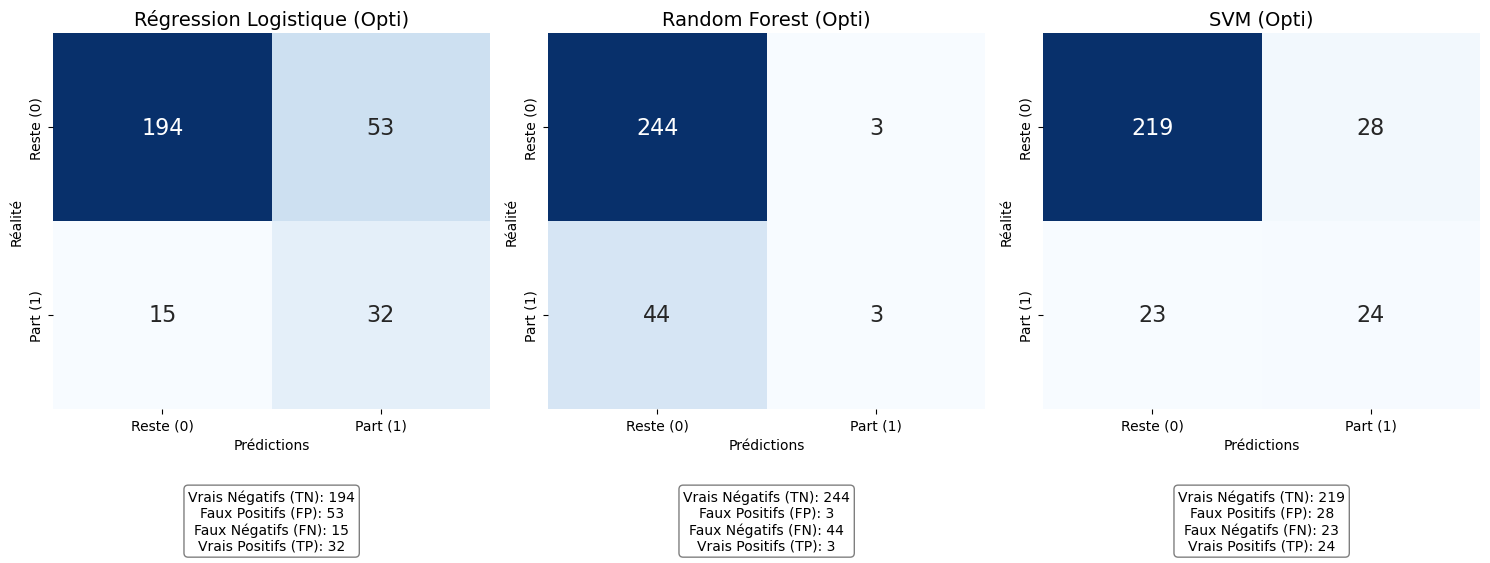

In [84]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Création d'une figure pour afficher les 3 matrices
fig, axes = plt.subplots(1, 3, figsize=(15, 6))

for i, (nom, model) in enumerate(modeles_opti.items()):
    preds = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, preds)
    
    # Extraction des valeurs de la matrice
    tn, fp, fn, tp = cm.ravel()
    
    # Affichage avec Seaborn
    sns.heatmap(cm, annot=True, fmt='d',cmap='Blues', ax=axes[i], cbar=False,
                annot_kws={"size": 16})
    
    # Ajout des labels personnalisés (TP, FP, etc.)
    axes[i].set_title(f"{nom}", fontsize=14)
    axes[i].set_xlabel('Prédictions')
    axes[i].set_ylabel('Réalité')
    axes[i].set_xticklabels(['Reste (0)', 'Part (1)'])
    axes[i].set_yticklabels(['Reste (0)', 'Part (1)'])
    
    # Ajout d'un texte récapitulatif sous chaque matrice
    stats_text = (f"Vrais Négatifs (TN): {tn}\n"
                  f"Faux Positifs (FP): {fp}\n"
                  f"Faux Négatifs (FN): {fn}\n"
                  f"Vrais Positifs (TP): {tp}")
    axes[i].text(0.5, -0.3, stats_text, ha='center', va='center', 
                 transform=axes[i].transAxes, bbox=dict(boxstyle='round', facecolor='white', alpha=0.5))

plt.tight_layout()
plt.show()

# Validation croisée

In [86]:
# On travaille sur une copie pour garder le dataframe original intact si besoin
df_enriched = data.copy()

# --- Vos demandes ---
# 1. Est fidèle (plus de 5 ans dans l'entreprise)
df_enriched['est_fidele'] = (df_enriched['annees_dans_l_entreprise'] > 5).astype(int)

# 2. Ratio Salaire / Age (Potentiel de carrière perçu)
df_enriched['ratio_salaire_age'] = df_enriched['revenu_mensuel'] / df_enriched['age']

# 3. Ratio Salaire / Heures Supp (Pression financière vs temps de travail)
# On ajoute +1 pour éviter la division par zéro si heures_supp est à 0
df_enriched['ratio_salaire_heures_supp'] = df_enriched['revenu_mensuel'] / (df_enriched['heure_supplementaires'] + 1)

# --- Mes suggestions supplémentaires ---
# 4. Satisfaction Globale (Moyenne des scores de satisfaction)
cols_satisfaction = [
    'satisfaction_employee_environnement', 
    'satisfaction_employee_nature_travail', 
    'satisfaction_employee_equipe', 
    'satisfaction_employee_equilibre_pro_perso'
]
df_enriched['satisfaction_globale'] = df_enriched[cols_satisfaction].mean(axis=1)

# 5. Stabilité dans le poste (Années dans le poste / Années dans l'entreprise)
# Un ratio faible peut indiquer une promotion récente ou un changement fréquent
df_enriched['stabilite_poste_ratio'] = df_enriched['annees_dans_le_poste_actuel'] / (df_enriched['annees_dans_l_entreprise'] + 1)

# 6. Éloignement vs Salaire (Est-ce que le trajet "vaut le coup" ?)
df_enriched['pression_trajet_salaire'] = df_enriched['distance_domicile_travail'] / (df_enriched['revenu_mensuel'] / 1000)

print(f"Nouvelles colonnes créées. Total colonnes : {df_enriched.shape[1]}")

Nouvelles colonnes créées. Total colonnes : 51


In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_curve, auc, f1_score, classification_report
from sklearn.preprocessing import StandardScaler

# --- 1. Préparation ---
# Stratification déjà gérée au split précédent. 
# Supposons X_train, X_test, y_train, y_test prêts.

# --- 2. Validation Croisée Personnalisée ---
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_f1_scores = []

# Modèle non-linéaire avec poids des classes
model_nl = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

print("Début de la Validation Croisée...")
for i, (train_index, val_index) in enumerate(skf.split(X_train_scaled, y_train)):
    # Séparation interne au train pour la validation
    X_train_fold, X_val_fold = X_train_scaled[train_index], X_train_scaled[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index]
    
    # Entraînement
    model_nl.fit(X_train_fold, y_train_fold)
    
    # Évaluation sur le fold de validation
    preds_fold = model_nl.predict(X_val_fold)
    score = f1_score(y_val_fold, preds_fold)
    fold_f1_scores.append(score)
    print(f"Fold {i+1} - F1-Score: {score:.4f}")

print(f"\n📊 Moyenne F1: {np.mean(fold_f1_scores):.4f}")
print(f"📉 Écart-type F1: {np.std(fold_f1_scores):.4f} (Si faible = bonne généralisation)")

Début de la Validation Croisée...
Fold 1 - F1-Score: 0.3111
Fold 2 - F1-Score: 0.1905
Fold 3 - F1-Score: 0.4000
Fold 4 - F1-Score: 0.2667
Fold 5 - F1-Score: 0.3922

📊 Moyenne F1: 0.3121
📉 Écart-type F1: 0.0787 (Si faible = bonne généralisation)


Le modèle est aveugle aux départs. Je vais modifier le seuil de détection pour améliorer le modèle quitte à baisser la précision.

# Fine tuning

Étape 1 : Identification des variables clés...
Étape 2 : Optimisation sur 24 variables...
Meilleurs paramètres : {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}

Étape 3 : Validation Croisée avec Seuil à 0.3...
✅ Recall Moyen (Seuil 0.3) : 0.5579 (+/- 0.0770)
✅ F1-Score Moyen (Seuil 0.3) : 0.5557

Étape 4 : Performance Finale (Matrice de Confusion)...
              precision    recall  f1-score   support

           0       0.91      0.91      0.91       247
           1       0.51      0.51      0.51        47

    accuracy                           0.84       294
   macro avg       0.71      0.71      0.71       294
weighted avg       0.84      0.84      0.84       294



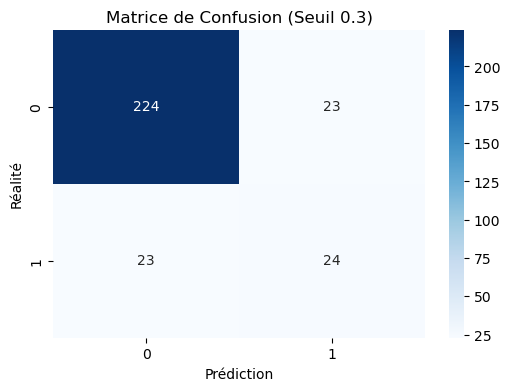

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, classification_report, confusion_matrix

# --- 1. SÉLECTION DES FEATURES (FINE-TUNING PAR L'IMPORTANCE) ---
# On utilise le modèle initial pour identifier les variables qui portent l'information
print("Étape 1 : Identification des variables clés...")
importances = model_nl.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
# On garde les variables > 1% d'importance (ajustable selon vos résultats)
top_features = feature_importance_df[feature_importance_df['Importance'] > 0.01]['Feature'].tolist()

# Création des nouveaux jeux de données restreints
X_train_refined = pd.DataFrame(X_train_scaled, columns=X.columns)[top_features]
X_test_refined = pd.DataFrame(X_test_scaled, columns=X.columns)[top_features]

# --- 2. OPTIMISATION DES HYPERPARAMÈTRES (GRIDSEARCH) ---
print(f"Étape 2 : Optimisation sur {len(top_features)} variables...")
# On optimise le SVM car il a montré les meilleurs résultats initiaux
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'sigmoid'],
    'class_weight': ['balanced']
}

grid_search = GridSearchCV(SVC(probability=True, random_state=42), 
                           param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_refined, y_train)

best_model = grid_search.best_estimator_
print(f"Meilleurs paramètres : {grid_search.best_params_}")

# --- 3. VALIDATION CROISÉE AVEC SEUIL FORCÉ À 0.3 ---
print("\nÉtape 3 : Validation Croisée avec Seuil à 0.3...")
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
custom_threshold = 0.3
cv_recalls = []
cv_f1s = []

for train_idx, val_idx in skf.split(X_train_refined, y_train):
    xt, xv = X_train_refined.iloc[train_idx], X_train_refined.iloc[val_idx]
    yt, yv = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
    # Entraînement
    best_model.fit(xt, yt)
    
    # Prédiction avec seuil personnalisé
    probs = best_model.predict_proba(xv)[:, 1]
    preds = (probs >= custom_threshold).astype(int)
    
    cv_recalls.append(recall_score(yv, preds))
    cv_f1s.append(f1_score(yv, preds))

print(f"✅ Recall Moyen (Seuil 0.3) : {np.mean(cv_recalls):.4f} (+/- {np.std(cv_recalls):.4f})")
print(f"✅ F1-Score Moyen (Seuil 0.3) : {np.mean(cv_f1s):.4f}")

# --- 4. ÉVALUATION FINALE SUR LE TEST SET ---
print("\nÉtape 4 : Performance Finale (Matrice de Confusion)...")
final_probs = best_model.predict_proba(X_test_refined)[:, 1]
final_preds = (final_probs >= custom_threshold).astype(int)

print(classification_report(y_test, final_preds))

# Affichage visuel pour votre rapport
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, final_preds), annot=True, fmt='d', cmap='Blues')
plt.title(f'Matrice de Confusion (Seuil {custom_threshold})')
plt.ylabel('Réalité')
plt.xlabel('Prédiction')
plt.show()

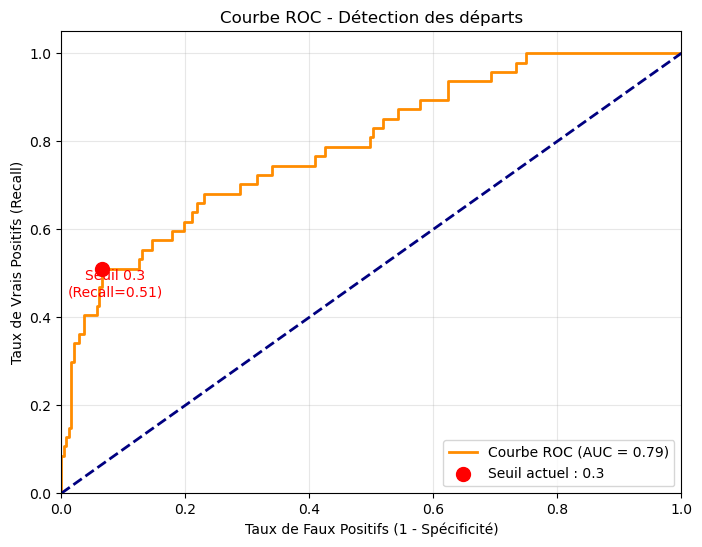

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# 1. Calcul des probabilités et de la courbe ROC
# On utilise les probabilités de la classe 1 (départ)
y_probs = best_model.predict_proba(X_test_refined)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# 2. Trouver les coordonnées pour le seuil de 0.3
# On cherche l'index du seuil le plus proche de 0.3
idx_seuil = np.argmin(np.abs(thresholds - 0.3))
fpr_3 = fpr[idx_seuil]
tpr_3 = tpr[idx_seuil]

# 3. Tracé de la courbe
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # Diagonale de référence (hasard)

# Ajout du point spécifique au seuil 0.3
plt.scatter(fpr_3, tpr_3, color='red', s=100, label=f'Seuil actuel : 0.3', zorder=5)
plt.annotate(f'Seuil 0.3\n(Recall={tpr_3:.2f})', (fpr_3, tpr_3), 
             textcoords="offset points", xytext=(10,-20), ha='center', color='red')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Taux de Faux Positifs (1 - Spécificité)")
plt.ylabel("Taux de Vrais Positifs (Recall)")
plt.title('Courbe ROC - Détection des départs')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

# XAI

## Permutation Importance

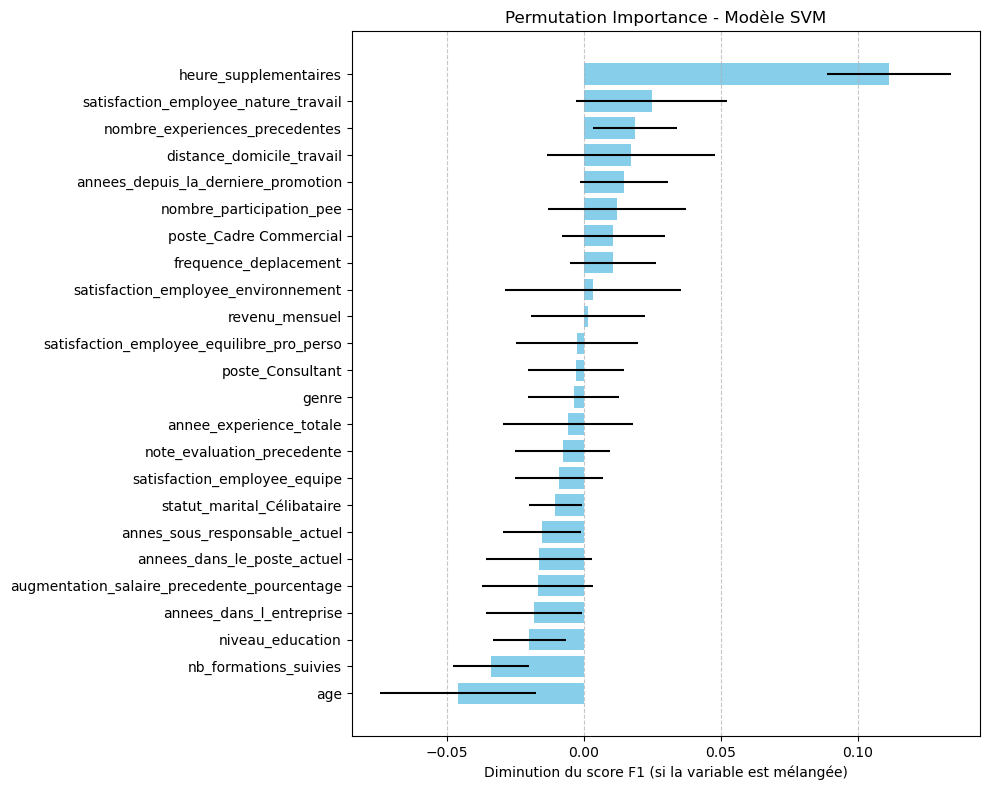

In [94]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import pandas as pd

# 1. Calcul de la permutation importance
# On utilise le score 'f1' car tes classes sont probablement déséquilibrées
# n_repeats=10 permet de stabiliser les résultats en mélangeant 10 fois chaque colonne
result = permutation_importance(
    best_model, X_test_refined, y_test, 
    n_repeats=10, 
    random_state=42, 
    scoring='f1'
)

# 2. Organisation des résultats dans un DataFrame
sorted_idx = result.importances_mean.argsort()
importance_df = pd.DataFrame({
    'feature': X_test_refined.columns[sorted_idx],
    'importance': result.importances_mean[sorted_idx],
    'std': result.importances_std[sorted_idx]
})

# 3. Affichage graphique
plt.figure(figsize=(10, 8))
plt.barh(importance_df['feature'], importance_df['importance'], xerr=importance_df['std'], color='skyblue')
plt.xlabel("Diminution du score F1 (si la variable est mélangée)")
plt.title("Permutation Importance - Modèle SVM")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## Le Beeswarm Plot (Global)

  0%|          | 0/20 [00:00<?, ?it/s]

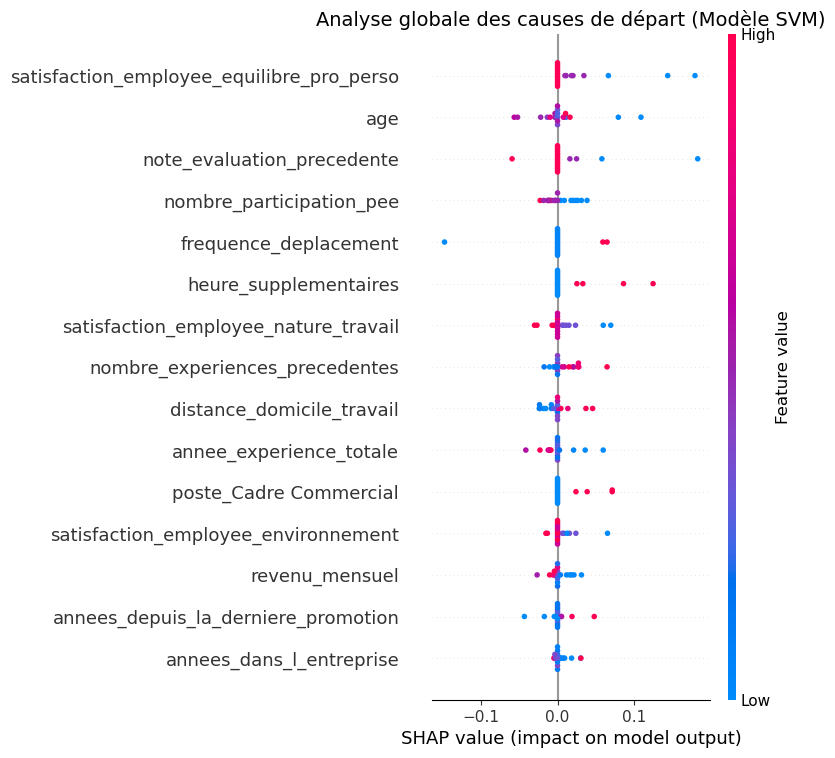

In [99]:
import shap
import matplotlib.pyplot as plt

# On utilise shap.kmeans pour la stabilité et la rapidité avec le SVM
background_summary = shap.kmeans(X_train_refined, 5)
explainer = shap.KernelExplainer(best_model.predict_proba, background_summary)

# On calcule les valeurs sur un échantillon 
X_test_sample = X_test_refined.sample(min(20, len(X_test_refined)), random_state=42)
shap_values = explainer.shap_values(X_test_sample)

# 1. Extraction de la classe 1 (Départ) 
if isinstance(shap_values, list):
    vals_to_plot = shap_values[1]
elif len(shap_values.shape) == 3:
    vals_to_plot = shap_values[:, :, 1]
else:
    vals_to_plot = shap_values

# 2. Affichage du Beeswarm Plot
plt.figure(figsize=(12, 8))
shap.summary_plot(
    vals_to_plot, 
    X_test_sample, 
    max_display=15, 
    show=False
)
plt.title("Analyse globale des causes de départ (Modèle SVM)", fontsize=14)
plt.show()

## Le Waterfall Plot (Local)

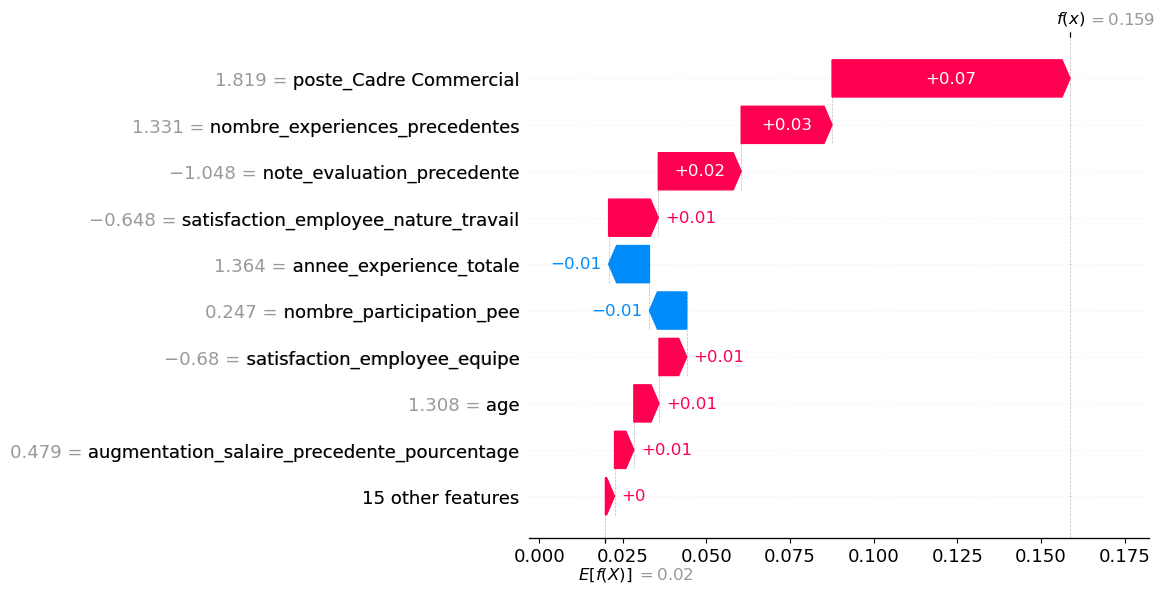

In [109]:
# 1. Sélection de l'index
idx_to_plot = 0 

# 2. Extraction manuelle et forcée de la classe 1 (Départ)
# On vérifie si vals_to_plot est une liste ou un array multi-dimensionnel
if isinstance(vals_to_plot, list):
    # Si c'est une liste de deux tableaux, on prend le deuxième (classe 1)
    row_values = vals_to_plot[1][idx_to_plot]
elif len(vals_to_plot.shape) == 3:
    # Si c'est un array (individus, features, classes), on prend l'individu et la classe 1
    row_values = vals_to_plot[idx_to_plot, :, 1]
else:
    # Si c'est déjà un array (individus, features), on prend juste l'individu
    row_values = vals_to_plot[idx_to_plot]

# 3. Extraction de la base_value pour la classe 1
if isinstance(explainer.expected_value, (list, np.ndarray)):
    b_val = explainer.expected_value[1]
else:
    b_val = explainer.expected_value

# 4. Reconstruction d'un objet Explanation 1D pur
# On s'assure que row_values et data ont la même longueur
data_row = X_test_sample.iloc[idx_to_plot].values
feat_names = X_test_sample.columns.tolist()

exp_final = shap.Explanation(
    values=row_values.astype(float), 
    base_values=float(b_val),
    data=data_row,
    feature_names=feat_names
)

# 5. Affichage (en forçant le passage d'un objet unique)
plt.figure(figsize=(10, 6))
shap.plots.waterfall(exp_final)
plt.show()